# Finance & Risk Analytics Project

**You are requested to create an Indian credit risk(default) model, using the data provided in the spreadsheet.**

**Dependent variable** - We need to create a default variable which should take the value of 1 when net worth next year is negative & 0 when net worth next year is positive.

**Validation Dataset** -  We need to build the model on a train dataset and check the model performance measures on the validation dataset.

In [931]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import StandardScaler,RobustScaler
from sklearn.metrics import roc_auc_score

import warnings
warnings.filterwarnings("ignore")

In [932]:
#lets read the data set
company = pd.read_csv("Company.csv")

### EDA

In [933]:
company.head()

Num  Networth Next Year  Total assets  Net worth  Total income  \
0    1              395.30        827.60     336.50        534.10   
1    2               36.20         67.70      24.30        137.90   
2    3               84.00        238.40      78.90        331.20   
3    4             2041.40       6883.50    1443.30       8448.50   
4    5               41.80         90.90      47.00        388.60   

   Change in stock  Total expenses  Profit after tax  PBDITA    PBT  ...  \
0            13.50          508.70             38.90  124.40  64.60  ...   
1            -3.70          131.00              3.20    5.50   1.00  ...   
2           -18.10          309.20              3.90   25.80  10.50  ...   
3           212.20         8482.40            178.30  418.40 185.10  ...   
4             3.40          392.70             -0.70    7.20  -0.60  ...   

   Debtors turnover  Finished goods turnover  WIP turnover  \
0              5.65                     3.99          3.37   
1               NaN                      NaN           NaN   
2              2.51                    17.67          8.76   
3              1.91                    18.14         18.62   
4             68.00                    45.87         28.67   

   Raw material turnover  Shares outstanding  Equity face value   EPS  \
0                  14.87          8760056.00              10.00  4.44   
1                    NaN                 NaN                NaN  0.00   
2                   8.35                 NaN                NaN  0.00   
3                  11.11         10000000.00              10.00 17.60   
4                  19.93           107315.00             100.00 -6.52   

   Adjusted EPS  Total liabilities  PE on BSE  
0          4.44             827.60        NaN  
1          0.00              67.70        NaN  
2          0.00             238.40        NaN  
3         17.60            6883.50        NaN  
4         -6.52              90.90        NaN  

[5 rows x 51 columns]

In [934]:
company.tail()

Num  Networth Next Year  Total assets  Net worth  Total income  \
4251  4252                0.20          0.40       0.20           NaN   
4252  4253               93.30        159.60      86.70        172.90   
4253  4254              932.20        833.80     664.60       2314.70   
4254  4255               64.60         95.00      48.50        110.50   
4255  4256                0.00        384.60     111.30        345.80   

      Change in stock  Total expenses  Profit after tax  PBDITA    PBT  ...  \
4251              NaN             NaN               NaN     NaN    NaN  ...   
4252             0.10          169.70              3.30   18.40   3.70  ...   
4253            32.10         2151.60            195.20  348.40 303.00  ...   
4254             4.60          113.50              1.60    9.70   2.60  ...   
4255            11.30          341.70             15.40   57.60  20.70  ...   

      Debtors turnover  Finished goods turnover  WIP turnover  \
4251              0.00                      NaN           NaN   
4252              1.80                    11.00          8.28   
4253              6.08                    59.28         31.14   
4254              3.71                    78.99         11.51   
4255              4.71                    53.37          8.33   

      Raw material turnover  Shares outstanding  Equity face value   EPS  \
4251                   0.00                 NaN                NaN  0.00   
4252                   9.88          8162700.00              10.00  0.42   
4253                   9.87          7479762.00              10.00 26.58   
4254                  14.95                 NaN                NaN  0.00   
4255                   3.74           960000.00              10.00 15.63   

      Adjusted EPS  Total liabilities  PE on BSE  
4251          0.00               0.40        NaN  
4252          0.42             159.60      16.81  
4253         26.58             833.80       5.69  
4254          0.00              95.00        NaN  
4255         15.63             384.60        NaN  

[5 rows x 51 columns]

In [935]:
company.shape

(4256, 51)

In [936]:
print(f"no.of rows is {company.shape[0]} and no. of features is {company.shape[1]} in the dataset")

no.of rows is 4256 and no. of features is 51 in the dataset


In [937]:
company.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4256 entries, 0 to 4255
Data columns (total 51 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Num                                          4256 non-null   int64  
 1   Networth Next Year                           4256 non-null   float64
 2   Total assets                                 4256 non-null   float64
 3   Net worth                                    4256 non-null   float64
 4   Total income                                 4025 non-null   float64
 5   Change in stock                              3706 non-null   float64
 6   Total expenses                               4091 non-null   float64
 7   Profit after tax                             4102 non-null   float64
 8   PBDITA                                       4102 non-null   float64
 9   PBT                                          4102 non-null   float64
 10  

In [938]:
company.columns = company.columns.str.replace(' ', '_').str.replace('(', '').str.replace(')', '').str.replace('%', 'perc').str.replace('/', '_to_').str.replace('&','_and_')

In [939]:
pd.options.display.float_format = '{:.2f}'.format 

In [940]:
company.describe().round(2)

Num  Networth_Next_Year  Total_assets  Net_worth  Total_income  \
count 4256.00             4256.00       4256.00    4256.00       4025.00   
mean  2128.50             1344.74       3573.62    1351.95       4688.19   
std   1228.75            15936.74      30074.44   12961.31      53918.95   
min      1.00           -74265.60          0.10       0.00          0.00   
25%   1064.75                3.98         91.30      31.48        107.10   
50%   2128.50               72.10        315.50     104.80        455.10   
75%   3192.25              330.82       1120.80     389.85       1485.00   
max   4256.00           805773.40    1176509.20  613151.60    2442828.20   

       Change_in_stock  Total_expenses  Profit_after_tax    PBDITA       PBT  \
count          3706.00         4091.00           4102.00   4102.00   4102.00   
mean             43.70         4356.30            295.05    605.94    410.26   
std             436.92        51398.09           3079.90   5646.23   4217.42   
min           -3029.40           -0.10          -3908.30   -440.70  -3894.80   
25%              -1.80           96.80              0.50      6.93      0.80   
50%               1.60          426.80              9.00     36.90     12.60   
75%              18.40         1395.70             53.30    158.70     74.18   
max           14185.50      2366035.30         119439.10 208576.50 145292.60   

       ...  Debtors_turnover  Finished_goods_turnover  WIP_turnover  \
count  ...           3871.00                  3382.00       3492.00   
mean   ...             17.93                    84.37         28.68   
std    ...             90.16                   562.64        169.65   
min    ...              0.00                    -0.09         -0.18   
25%    ...              3.81                     8.19          5.10   
50%    ...              6.47                    17.32          9.86   
75%    ...             11.85                    40.01         20.24   
max    ...           3135.20                 17947.60       5651.40   

       Raw_material_turnover  Shares_outstanding  Equity_face_value  \
count                3828.00             3446.00            3446.00   
mean                   17.73         23764909.56           -1094.83   
std                   343.13        170979041.33           34101.36   
min                    -2.00      -2147483647.00         -999998.90   
25%                     3.02          1308382.50              10.00   
50%                     6.41          4750000.00              10.00   
75%                    11.82         10906020.00              10.00   
max                 21092.00       4130400545.00          100000.00   

             EPS  Adjusted_EPS  Total_liabilities  PE_on_BSE  
count    4256.00       4256.00            4256.00    1629.00  
mean     -196.22       -197.53            3573.62      55.46  
std     13061.95      13061.93           30074.44    1304.45  
min   -843181.82    -843181.82               0.10   -1116.64  
25%         0.00          0.00              91.30       2.97  
50%         1.49          1.24             315.50       8.69  
75%        10.00          7.62            1120.80      17.00  
max     34522.53      34522.53         1176509.20   51002.74  

[8 rows x 51 columns]

In [941]:
company.duplicated().sum()

0

#### Let's create a default variable using Networth Next Year variable

In [942]:
company["Default"] = np.where(company["Networth_Next_Year"]>0,0,1)

In [943]:
company[["Default","Networth_Next_Year"]].head()

Default  Networth_Next_Year
0        0              395.30
1        0               36.20
2        0               84.00
3        0             2041.40
4        0               41.80

In [944]:
company.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4256 entries, 0 to 4255
Data columns (total 52 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Num                                             4256 non-null   int64  
 1   Networth_Next_Year                              4256 non-null   float64
 2   Total_assets                                    4256 non-null   float64
 3   Net_worth                                       4256 non-null   float64
 4   Total_income                                    4025 non-null   float64
 5   Change_in_stock                                 3706 non-null   float64
 6   Total_expenses                                  4091 non-null   float64
 7   Profit_after_tax                                4102 non-null   float64
 8   PBDITA                                          4102 non-null   float64
 9   PBT                                      

### let's visualize the plot with the box plot and hist plot
## univariate analysis:

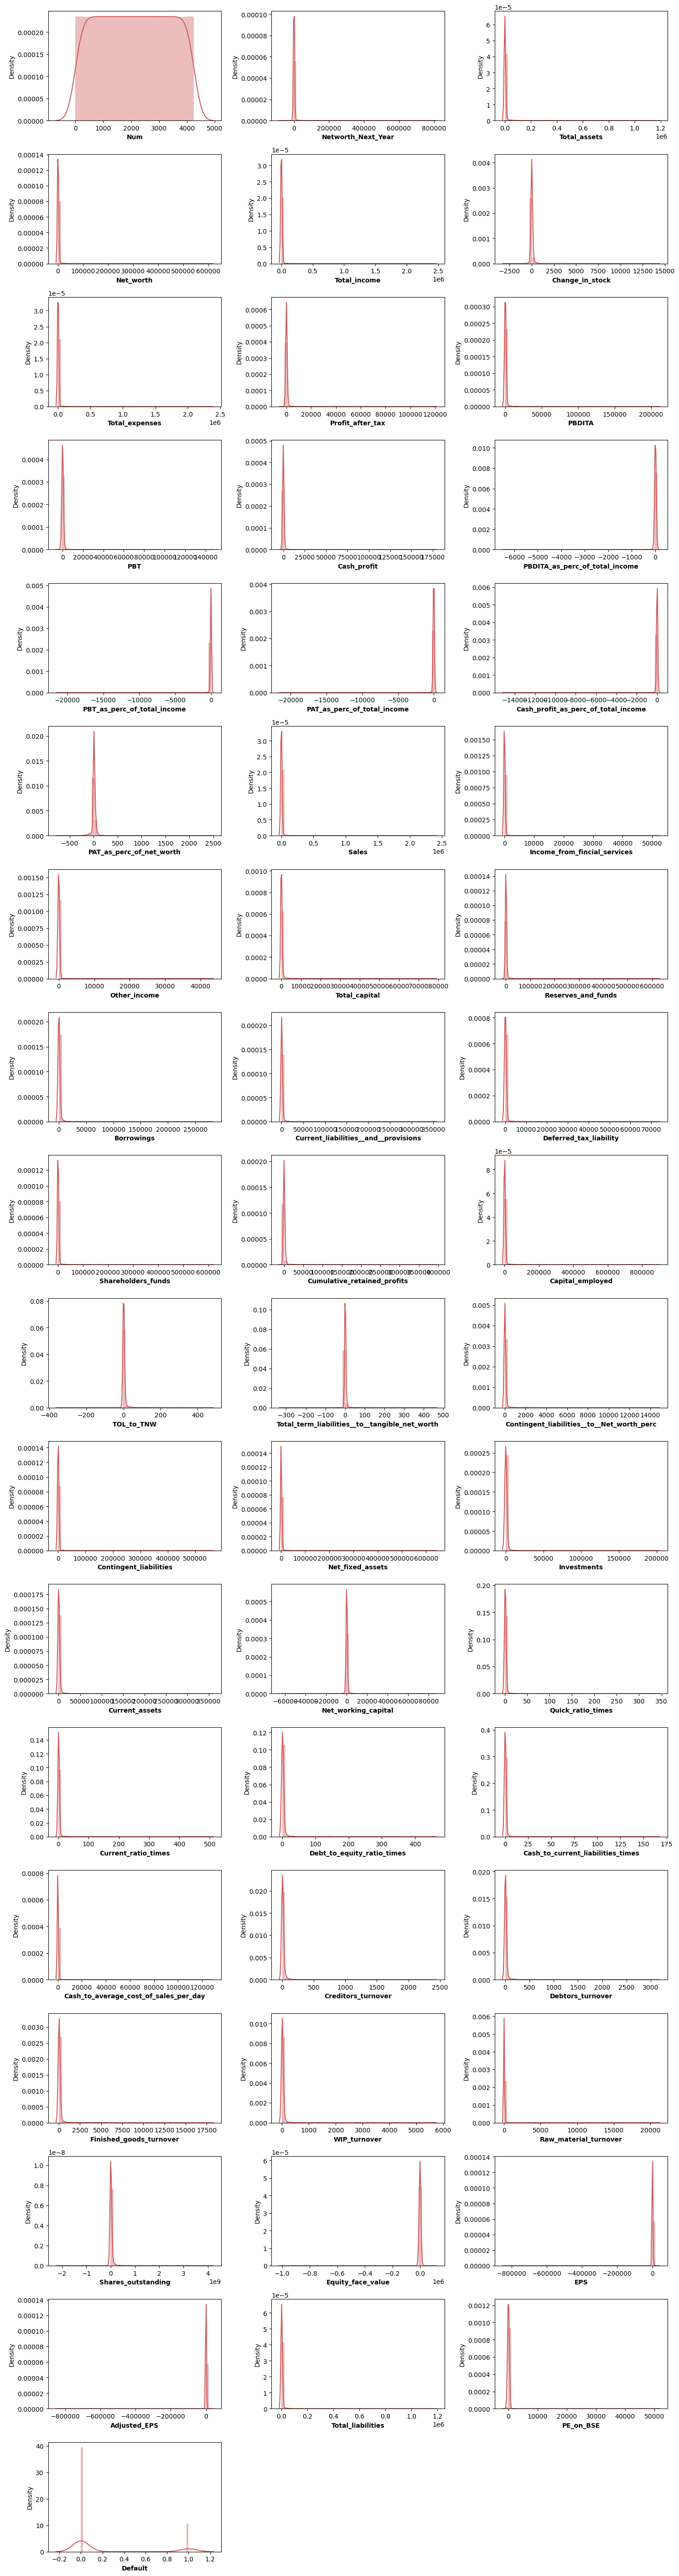

In [15]:
numeric_features = [feature for feature in company.columns if company[feature].dtype != 'O']

plt.figure(figsize=(15, 100))
for i, col in enumerate(numeric_features):
    plt.subplot(32, 3, i+1)
    sns.distplot(x=company[col], color='indianred')
    plt.xlabel(col, weight='bold')
    plt.tight_layout()

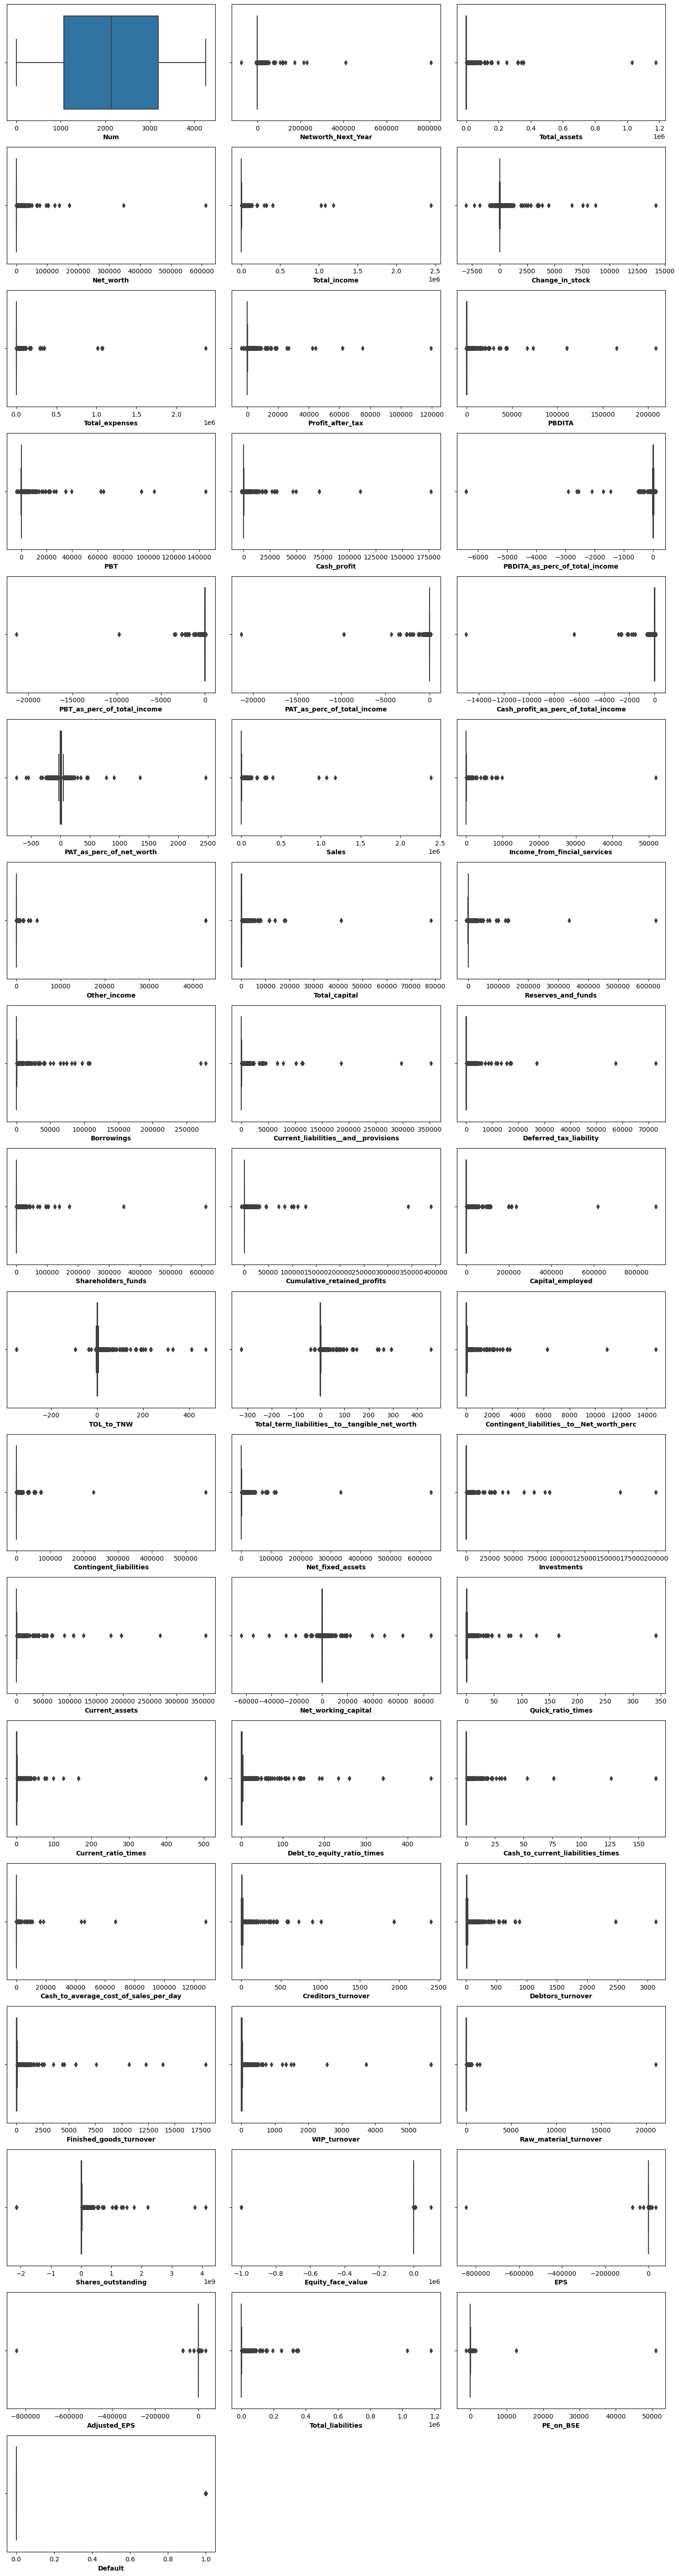

In [16]:
plt.figure(figsize=(15, 100))
for i, col in enumerate(numeric_features):
    plt.subplot(32, 3, i+1)
    sns.boxplot(x=company[col])
    plt.xlabel(col, weight='bold')
    plt.tight_layout()

### Bivariate analysis

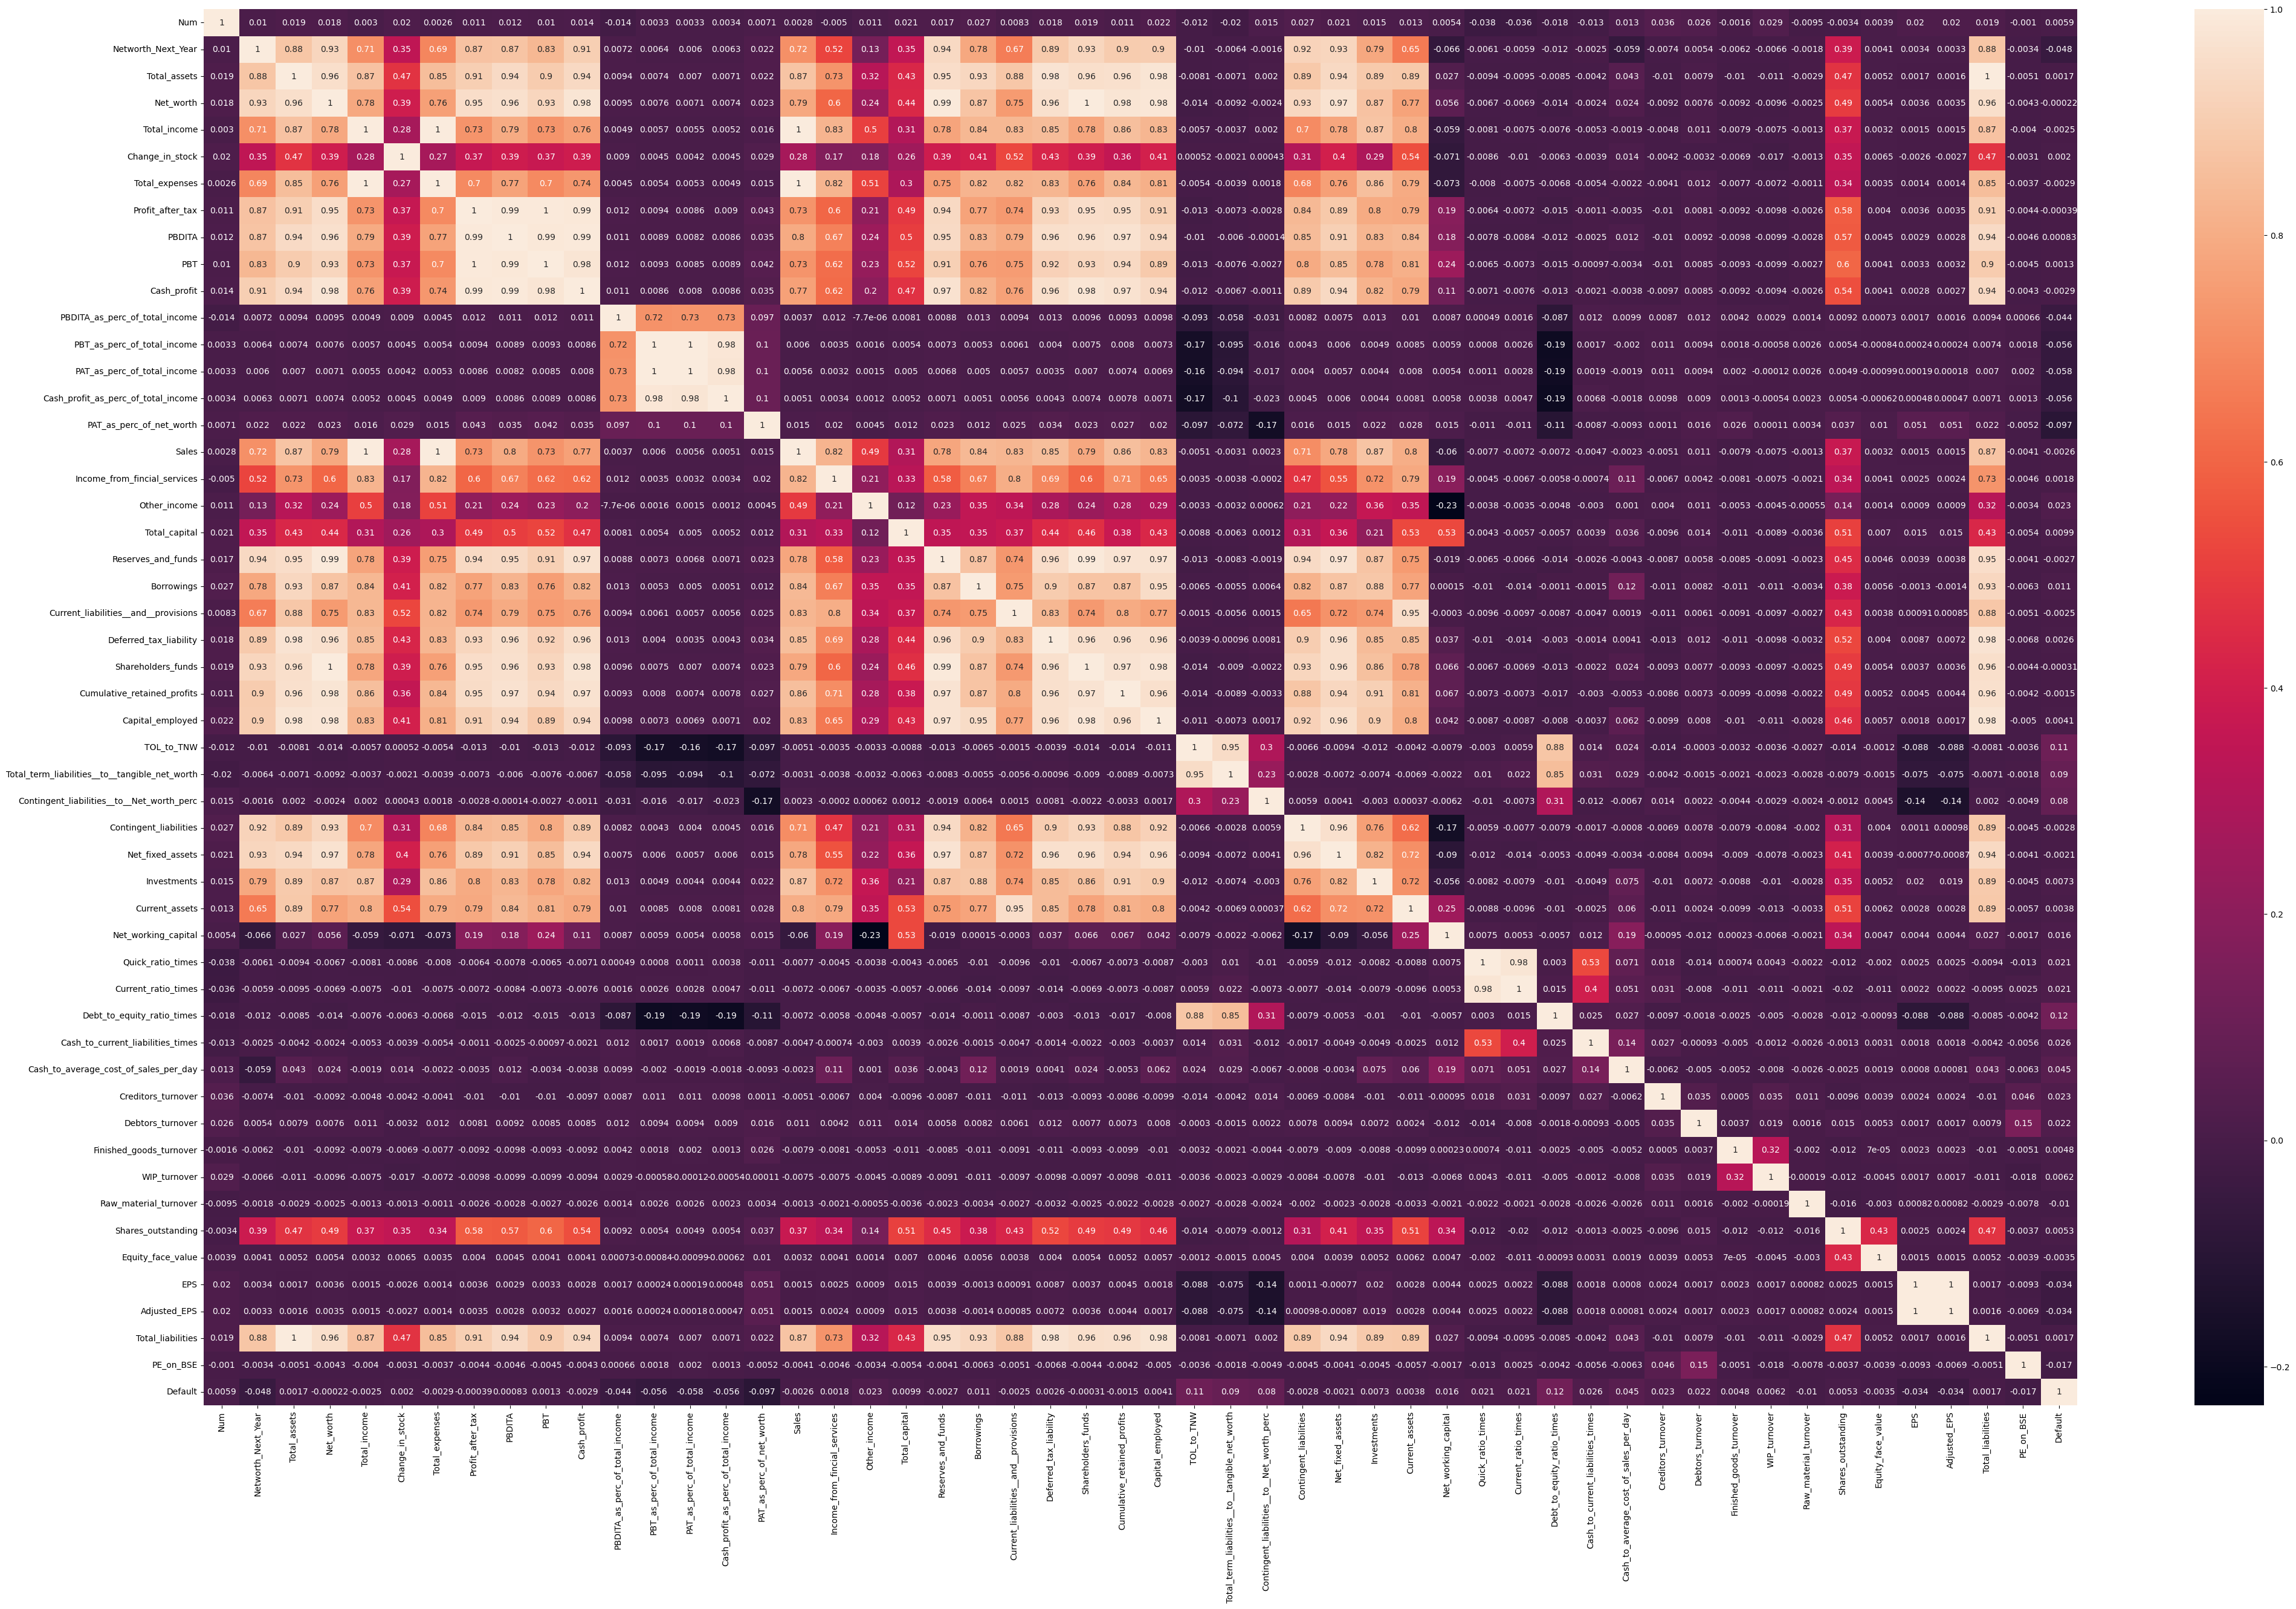

In [17]:
plt.figure(figsize=(50, 30))
sns.heatmap(company.corr(),annot = True)
plt.show()

In [945]:
company["Default"].value_counts()

0    3352
1     904
Name: Default, dtype: int64

In [946]:
company["Default"].value_counts(1)

0   0.79
1   0.21
Name: Default, dtype: float64

In [947]:
company.size

221312

In [948]:
company.isnull().sum().sum()

17778

In [949]:
17778/217056

0.08190513047324192

***8% of the data contains missing data in the overall data set***

### Let's check the number of outliers in the dataset

In [950]:
company_x = company.drop("Default",axis=1)
company_y = company["Default"]

In [951]:
Q1 = company_x.quantile(0.25)
Q3 = company_x.quantile(0.75)
IQR = Q3-Q1
UL = Q3+1.5*IQR
LL = Q1-1.5*IQR

In [952]:
((company_x > UL) | (company_x < LL)).sum().sum()

25946

In [953]:
25946/217056

0.1195359722836503

***12% of the data contains Outliers in the overall data set***

***Overall 20% of the data contains missing data and outliers***

we need to do right treatment for this missing data and outliers

#### lets get the missing values features and there percentages in the dataset

### 1. Missing values in the rows 

Let's filter the data which is 90% or more complete at the row level

In [954]:
company_x.isnull().sum(axis =1)

0        2
1        9
2        4
3        3
4        3
        ..
4251    25
4252     3
4253     0
4254     6
4255     2
Length: 4256, dtype: int64

In [955]:
df_temp = company[company.isnull().sum(axis =1) <=5]

In [956]:
df_temp.shape

(3194, 52)

In [957]:
df_temp.Default.value_counts()

0    2547
1     647
Name: Default, dtype: int64

In [958]:
company.Default.value_counts()

0    3352
1     904
Name: Default, dtype: int64

#### If we drop the rows that are having missing values in greater than 5 features in a row we are going to loose the 25% of defaults in our the given dataset 

While we came down to 2547 rows from 3352 rows provided originally, we lose a moderate proportion of actual defaulters 904 in the original data vs. only 647 in the subset, threfore, end up losing more than 25% of the actual defaulters.

so we are not going to delete the rows more than 5 missing values in dataset

### 1. Missing values wrt the features 

In [959]:
features_with_na = [features for features in company.columns if company[features].isnull().sum() > 0]  

In [960]:
for feature in features_with_na:
    print(feature, "is having", np.round(company[feature].isnull().mean()*100, 3), '% missing values')

Total_income is having 5.428 % missing values
Change_in_stock is having 12.923 % missing values
Total_expenses is having 3.877 % missing values
Profit_after_tax is having 3.618 % missing values
PBDITA is having 3.618 % missing values
PBT is having 3.618 % missing values
Cash_profit is having 3.618 % missing values
PBDITA_as_perc_of_total_income is having 1.856 % missing values
PBT_as_perc_of_total_income is having 1.856 % missing values
PAT_as_perc_of_total_income is having 1.856 % missing values
Cash_profit_as_perc_of_total_income is having 1.856 % missing values
Sales is having 7.166 % missing values
Income_from_fincial_services is having 26.104 % missing values
Other_income is having 36.56 % missing values
Total_capital is having 0.117 % missing values
Reserves_and_funds is having 2.303 % missing values
Borrowings is having 10.127 % missing values
Current_liabilities__and__provisions is having 2.585 % missing values
Deferred_tax_liability is having 32.166 % missing values
Cumulative

#### We are droping the features that are having more than 30% missing values in the dataset 

In [961]:
company = company.drop(["Other_income","Deferred_tax_liability","Contingent_liabilities","Investments","PE_on_BSE"],axis=1)

#### and also dropping the unwanted features Num and Networth_Next_Year in the dataset 

In [962]:
company = company.drop(["Num","Networth_Next_Year"],axis =1)

In [963]:
company1 = company.copy()

In [964]:
company.shape

(4256, 45)

### 1. Missing Value Treatment

Since we have many outliers in our the dataset and It is not good to impute with the median and as well as mean so we are going to use the KNN imputer for this Missing value imputation

In [965]:
# multivariate imputation
from sklearn.impute import KNNImputer

In [966]:
imputer = KNNImputer(
    n_neighbors=5, # the number of neighbours K
    weights='distance', # the weighting factor
    metric='nan_euclidean', # the metric to find the neighbours
    add_indicator=False, # whether to add a missing indicator
)

In [967]:
company_imputed = pd.DataFrame(imputer.fit_transform(company), columns=company.columns)

In [968]:
company_imputed.isnull().sum()

Total_assets                                      0
Net_worth                                         0
Total_income                                      0
Change_in_stock                                   0
Total_expenses                                    0
Profit_after_tax                                  0
PBDITA                                            0
PBT                                               0
Cash_profit                                       0
PBDITA_as_perc_of_total_income                    0
PBT_as_perc_of_total_income                       0
PAT_as_perc_of_total_income                       0
Cash_profit_as_perc_of_total_income               0
PAT_as_perc_of_net_worth                          0
Sales                                             0
Income_from_fincial_services                      0
Total_capital                                     0
Reserves_and_funds                                0
Borrowings                                        0
Current_liab

In [969]:
company_imputed["Equity_face_value"].value_counts()

10.00     3294
100.00     309
10.00      120
10.00      119
5.00        61
          ... 
46.95        1
24.39        1
13.54        1
8.94         1
64.55        1
Name: Equity_face_value, Length: 202, dtype: int64

### 2. Outlier Detection and Treatment

In [970]:
company_imputed_x = company_imputed.drop('Default', axis = 1)
company_imputed_y = company_imputed['Default']

In [971]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [972]:
for column in company_imputed_x.columns:
    lr,ur = remove_outlier(company_imputed_x[column])
    company_imputed_x[column] = np.where(company_imputed_x[column] > ur, ur,company_imputed_x[column])
    company_imputed_x[column] = np.where(company_imputed_x[column] < lr, lr,company_imputed_x[column])

In [973]:
Q1 = company_imputed_x.quantile(0.25)
Q3 = company_imputed_x.quantile(0.75)
IQR = Q3-Q1
UL = Q3+1.5*IQR
LL = Q1-1.5*IQR

In [974]:
((company_imputed_x > UL) | (company_imputed_x < LL)).sum()

Total_assets                                      0
Net_worth                                         0
Total_income                                      0
Change_in_stock                                   0
Total_expenses                                    0
Profit_after_tax                                  0
PBDITA                                            0
PBT                                               0
Cash_profit                                       0
PBDITA_as_perc_of_total_income                    0
PBT_as_perc_of_total_income                       0
PAT_as_perc_of_total_income                       0
Cash_profit_as_perc_of_total_income               0
PAT_as_perc_of_net_worth                          0
Sales                                             0
Income_from_fincial_services                      0
Total_capital                                     0
Reserves_and_funds                                0
Borrowings                                        0
Current_liab

In [975]:
company["Equity_face_value"].value_counts()

10.00         2913
100.00         309
5.00            61
1.00            54
2.00            47
1000.00         35
-999998.90       4
2.50             4
10000.00         3
4.00             3
250.00           2
50.00            2
500.00           2
25.00            2
8.00             2
15.00            1
100000.00        1
30.00            1
Name: Equity_face_value, dtype: int64

In [976]:
company_imputed_x["Equity_face_value"].value_counts()

10.00    4256
Name: Equity_face_value, dtype: int64

In [977]:
company_imputed_x = company_imputed_x.drop("Equity_face_value",axis = 1)

### 3. Checking Correlation amongst the variables using heatmap

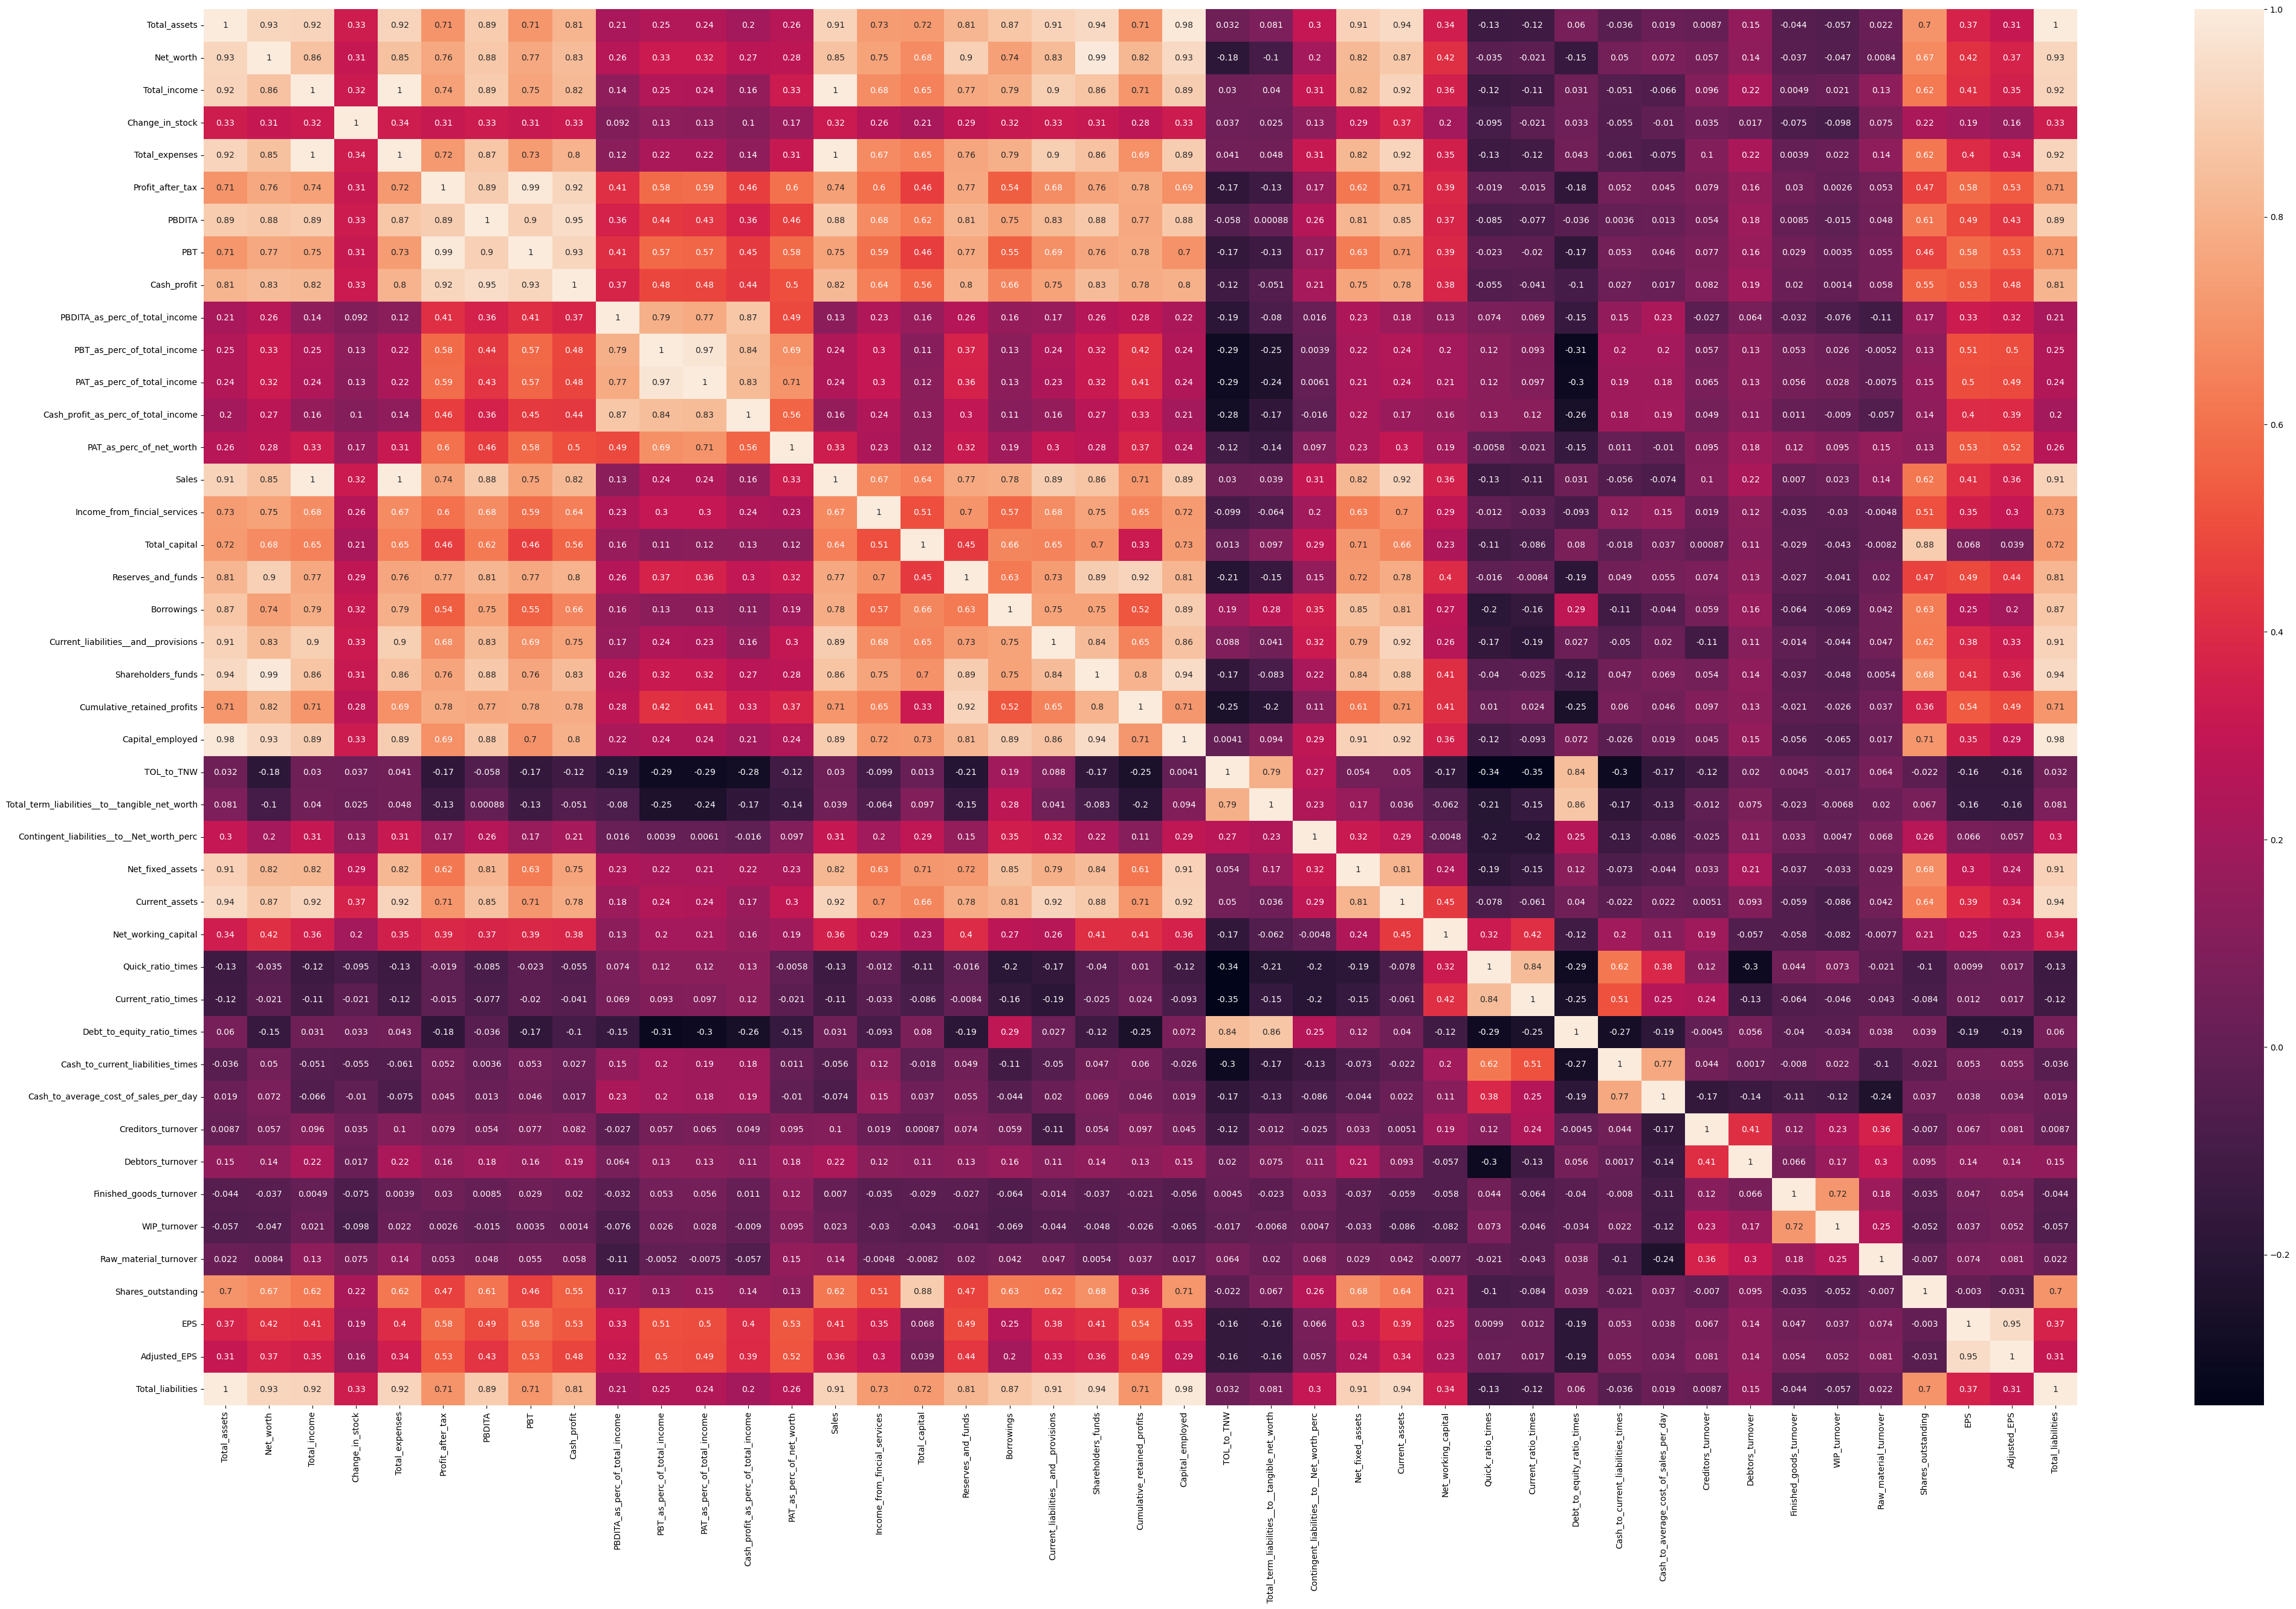

In [643]:
plt.figure(figsize=(50, 30))
sns.heatmap(company_imputed_x.corr(),annot = True)
plt.show()

##### Before building we need to scale the features so the linear models can get better metrics

In [978]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_x = pd.DataFrame(scaler.fit_transform(company_imputed_x),columns = company_imputed_x.columns)

In [979]:
company_scaled = pd.concat([scaled_x,company_imputed_y],axis =1)

### 4. Train Test Data Split

In [980]:
from sklearn.model_selection import train_test_split

In [981]:
X_train,X_test,y_train,y_test = train_test_split(scaled_x,company_imputed_y,test_size=0.3,random_state=1)

In [982]:
company_train = pd.concat([X_train,y_train],axis=1)
company_test  = pd.concat([X_test,y_test],axis=1)

### 5. Build Logistic Regression Model (using statsmodel library) on most important variables on Train Dataset and choose the optimum cutoff. Also showcase your model building approach


In [983]:
import statsmodels.formula.api as SM

In [984]:
f_1 = 'Default ~ Total_assets+Net_worth+Total_income+Change_in_stock+Total_expenses+Profit_after_tax+PBDITA+PBT+Cash_profit+PBDITA_as_perc_of_total_income+PBT_as_perc_of_total_income+PAT_as_perc_of_total_income+Cash_profit_as_perc_of_total_income+PAT_as_perc_of_net_worth+Sales+Income_from_fincial_services+Total_capital+Reserves_and_funds+Borrowings+Current_liabilities__and__provisions+Shareholders_funds+Cumulative_retained_profits+Capital_employed+TOL_to_TNW+Total_term_liabilities__to__tangible_net_worth+Contingent_liabilities__to__Net_worth_perc+Net_fixed_assets+Current_assets+Net_working_capital+Quick_ratio_times+Current_ratio_times+Debt_to_equity_ratio_times+Cash_to_current_liabilities_times+Cash_to_average_cost_of_sales_per_day+Creditors_turnover+Debtors_turnover+Finished_goods_turnover+WIP_turnover+Raw_material_turnover+Shares_outstanding+EPS+Adjusted_EPS+Total_liabilities'

In [985]:
model_1 = SM.logit(formula=f_1,data = company_scaled).fit()

Optimization terminated successfully.
         Current function value: 0.494000
         Iterations 6


In [986]:
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Default   No. Observations:                 4256
Model:                          Logit   Df Residuals:                     4213
Method:                           MLE   Df Model:                           42
Date:                Sat, 25 Feb 2023   Pseudo R-squ.:                 0.04472
Time:                        21:54:53   Log-Likelihood:                -2102.5
converged:                       True   LL-Null:                       -2200.9
Covariance Type:            nonrobust   LLR p-value:                 6.696e-22
==================================================================================================================
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
Intercept                                         -1.3754      0.039    -34.925      0.000      -1.453      -1.298
Total_assets                                       0.0985        nan        nan        nan         nan         nan
Net_worth                                          0.0641      0.052      1.226      0.220      -0.038       0.167
Total_income                                      -0.0098      0.623     -0.016      0.987      -1.231       1.211
Change_in_stock                                   -0.0010      0.045     -0.021      0.983      -0.089       0.087
Total_expenses                                     0.9788      0.653      1.500      0.134      -0.300       2.258
Profit_after_tax                                   0.2386      0.281      0.849      0.396      -0.312       0.789
PBDITA                                            -0.0413      0.200     -0.207      0.836      -0.433       0.350
PBT                                                0.0241      0.286      0.084      0.933      -0.536       0.584
Cash_profit                                       -0.0731      0.172     -0.424      0.672      -0.411       0.265
PBDITA_as_perc_of_total_income                     0.0483      0.085      0.570      0.569      -0.118       0.214
PBT_as_perc_of_total_income                        0.1546      0.209      0.740      0.459      -0.255       0.564
PAT_as_perc_of_total_income                       -0.0312      0.203     -0.153      0.878      -0.430       0.368
Cash_profit_as_perc_of_total_income               -0.2649      0.101     -2.617      0.009      -0.463      -0.067
PAT_as_perc_of_net_worth                          -0.2776      0.063     -4.394      0.000      -0.401      -0.154
Sales                                             -0.8122      0.671     -1.210      0.226      -2.128       0.503
Income_from_fincial_services                       0.0039      0.063      0.061      0.951      -0.120       0.128
Total_capital                                     -0.0342      0.097     -0.352      0.725      -0.225       0.156
Reserves_and_funds                                -0.2421      0.123     -1.967      0.049      -0.483      -0.001
Borrowings                                        -0.1561      0.111     -1.412      0.158      -0.373       0.061
Current_liabilities__and__provisions              -0.0587      0.162     -0.363      0.717      -0.376       0.259
Shareholders_funds                                 0.2631      0.265      0.995      0.320      -0.255       0.782
Cumulative_retained_profits                       -0.0579      0.110     -0.528      0.597      -0.273       0.157
Capital_employed                                  -0.2920      0.308     -0.949      0.343      -0.895       0.311
TOL_to_TNW                                         0.1523      0.075      2.021      0.043       0.005       0.300
Total_term_liabilitie

In [987]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [988]:
X = company_scaled.drop('Default', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

variables    VIF
0                                     Total_assets    inf
42                               Total_liabilities    inf
2                                     Total_income 278.92
14                                           Sales 262.78
4                                   Total_expenses 191.04
20                              Shareholders_funds 122.61
1                                        Net_worth 110.09
22                                Capital_employed  85.33
7                                              PBT  58.99
5                                 Profit_after_tax  56.72
6                                           PBDITA  30.79
10                     PBT_as_perc_of_total_income  27.81
11                     PAT_as_perc_of_total_income  26.57
8                                      Cash_profit  23.11
27                                  Current_assets  19.74
19            Current_liabilities__and__provisions  15.50
17                              Reserves_and_funds  13.14
40                                             EPS  10.79
41                                    Adjusted_EPS   9.77
21                     Cumulative_retained_profits   8.81
26                                Net_fixed_assets   8.53
18                                      Borrowings   8.40
12             Cash_profit_as_perc_of_total_income   7.78
31                      Debt_to_equity_ratio_times   6.59
16                                   Total_capital   6.40
9                   PBDITA_as_perc_of_total_income   6.17
29                               Quick_ratio_times   5.78
39                              Shares_outstanding   5.65
23                                      TOL_to_TNW   5.51
24  Total_term_liabilities__to__tangible_net_worth   5.21
30                             Current_ratio_times   4.80
32               Cash_to_current_liabilities_times   4.42
33           Cash_to_average_cost_of_sales_per_day   3.40
13                        PAT_as_perc_of_net_worth   2.80
15                    Income_from_fincial_services   2.60
37                                    WIP_turnover   2.38
36                         Finished_goods_turnover   2.14
28                             Net_working_capital   2.08
35                                Debtors_turnover   1.96
34                              Creditors_turnover   1.81
38                           Raw_material_turnover   1.41
3                                  Change_in_stock   1.30
25      Contingent_liabilities__to__Net_worth_perc   1.27

In [655]:
X = X.drop('Total_assets', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

variables    VIF
1                                     Total_income 278.92
13                                           Sales 262.78
3                                   Total_expenses 191.04
19                              Shareholders_funds 122.61
0                                        Net_worth 110.09
41                               Total_liabilities 102.43
21                                Capital_employed  85.33
6                                              PBT  58.99
4                                 Profit_after_tax  56.72
5                                           PBDITA  30.79
9                      PBT_as_perc_of_total_income  27.81
10                     PAT_as_perc_of_total_income  26.57
7                                      Cash_profit  23.11
26                                  Current_assets  19.74
18            Current_liabilities__and__provisions  15.50
16                              Reserves_and_funds  13.14
39                                             EPS  10.79
40                                    Adjusted_EPS   9.77
20                     Cumulative_retained_profits   8.81
25                                Net_fixed_assets   8.53
17                                      Borrowings   8.40
11             Cash_profit_as_perc_of_total_income   7.78
30                      Debt_to_equity_ratio_times   6.59
15                                   Total_capital   6.40
8                   PBDITA_as_perc_of_total_income   6.17
28                               Quick_ratio_times   5.78
38                              Shares_outstanding   5.65
22                                      TOL_to_TNW   5.51
23  Total_term_liabilities__to__tangible_net_worth   5.21
29                             Current_ratio_times   4.80
31               Cash_to_current_liabilities_times   4.42
32           Cash_to_average_cost_of_sales_per_day   3.40
12                        PAT_as_perc_of_net_worth   2.80
14                    Income_from_fincial_services   2.60
36                                    WIP_turnover   2.38
35                         Finished_goods_turnover   2.14
27                             Net_working_capital   2.08
34                                Debtors_turnover   1.96
33                              Creditors_turnover   1.81
37                           Raw_material_turnover   1.41
2                                  Change_in_stock   1.30
24      Contingent_liabilities__to__Net_worth_perc   1.27

In [656]:
X = X.drop('Total_income', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

variables    VIF
2                                   Total_expenses 158.02
12                                           Sales 157.12
18                              Shareholders_funds 122.61
0                                        Net_worth 109.97
40                               Total_liabilities 102.07
20                                Capital_employed  85.07
5                                              PBT  58.96
3                                 Profit_after_tax  56.66
8                      PBT_as_perc_of_total_income  27.80
4                                           PBDITA  26.97
9                      PAT_as_perc_of_total_income  26.51
6                                      Cash_profit  21.30
25                                  Current_assets  19.68
17            Current_liabilities__and__provisions  15.50
15                              Reserves_and_funds  13.06
38                                             EPS  10.79
39                                    Adjusted_EPS   9.77
19                     Cumulative_retained_profits   8.81
24                                Net_fixed_assets   8.52
16                                      Borrowings   8.40
10             Cash_profit_as_perc_of_total_income   7.75
29                      Debt_to_equity_ratio_times   6.59
14                                   Total_capital   6.40
7                   PBDITA_as_perc_of_total_income   6.16
27                               Quick_ratio_times   5.78
37                              Shares_outstanding   5.65
21                                      TOL_to_TNW   5.51
22  Total_term_liabilities__to__tangible_net_worth   5.20
28                             Current_ratio_times   4.80
30               Cash_to_current_liabilities_times   4.42
31           Cash_to_average_cost_of_sales_per_day   3.40
11                        PAT_as_perc_of_net_worth   2.79
13                    Income_from_fincial_services   2.59
35                                    WIP_turnover   2.38
34                         Finished_goods_turnover   2.14
26                             Net_working_capital   2.08
33                                Debtors_turnover   1.96
32                              Creditors_turnover   1.81
36                           Raw_material_turnover   1.41
1                                  Change_in_stock   1.29
23      Contingent_liabilities__to__Net_worth_perc   1.27

In [657]:
X = X.drop('Total_expenses', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

variables    VIF
17                              Shareholders_funds 122.10
0                                        Net_worth 109.74
39                               Total_liabilities 102.05
19                                Capital_employed  85.04
4                                              PBT  58.68
2                                 Profit_after_tax  56.01
7                      PBT_as_perc_of_total_income  27.76
3                                           PBDITA  26.70
8                      PAT_as_perc_of_total_income  26.48
5                                      Cash_profit  20.76
24                                  Current_assets  19.63
16            Current_liabilities__and__provisions  15.40
14                              Reserves_and_funds  13.01
11                                           Sales  12.33
37                                             EPS  10.78
38                                    Adjusted_EPS   9.77
18                     Cumulative_retained_profits   8.81
23                                Net_fixed_assets   8.49
15                                      Borrowings   8.37
9              Cash_profit_as_perc_of_total_income   7.75
28                      Debt_to_equity_ratio_times   6.59
13                                   Total_capital   6.40
6                   PBDITA_as_perc_of_total_income   6.16
26                               Quick_ratio_times   5.78
36                              Shares_outstanding   5.62
20                                      TOL_to_TNW   5.51
21  Total_term_liabilities__to__tangible_net_worth   5.20
27                             Current_ratio_times   4.79
29               Cash_to_current_liabilities_times   4.42
30           Cash_to_average_cost_of_sales_per_day   3.40
10                        PAT_as_perc_of_net_worth   2.79
12                    Income_from_fincial_services   2.58
34                                    WIP_turnover   2.37
33                         Finished_goods_turnover   2.14
25                             Net_working_capital   2.08
32                                Debtors_turnover   1.95
31                              Creditors_turnover   1.80
35                           Raw_material_turnover   1.41
22      Contingent_liabilities__to__Net_worth_perc   1.27
1                                  Change_in_stock   1.24

In [658]:
X = X.drop('Shareholders_funds', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

variables    VIF
38                               Total_liabilities 102.05
18                                Capital_employed  81.22
4                                              PBT  58.68
2                                 Profit_after_tax  55.98
7                      PBT_as_perc_of_total_income  27.76
3                                           PBDITA  26.70
8                      PAT_as_perc_of_total_income  26.48
0                                        Net_worth  24.52
5                                      Cash_profit  20.65
23                                  Current_assets  19.61
16            Current_liabilities__and__provisions  15.34
14                              Reserves_and_funds  12.98
11                                           Sales  12.30
36                                             EPS  10.78
37                                    Adjusted_EPS   9.77
17                     Cumulative_retained_profits   8.81
22                                Net_fixed_assets   8.48
15                                      Borrowings   8.01
9              Cash_profit_as_perc_of_total_income   7.75
27                      Debt_to_equity_ratio_times   6.49
13                                   Total_capital   6.18
6                   PBDITA_as_perc_of_total_income   6.15
25                               Quick_ratio_times   5.78
35                              Shares_outstanding   5.58
19                                      TOL_to_TNW   5.48
20  Total_term_liabilities__to__tangible_net_worth   5.18
26                             Current_ratio_times   4.79
28               Cash_to_current_liabilities_times   4.42
29           Cash_to_average_cost_of_sales_per_day   3.39
10                        PAT_as_perc_of_net_worth   2.79
12                    Income_from_fincial_services   2.57
33                                    WIP_turnover   2.37
32                         Finished_goods_turnover   2.14
24                             Net_working_capital   2.08
31                                Debtors_turnover   1.95
30                              Creditors_turnover   1.80
34                           Raw_material_turnover   1.41
21      Contingent_liabilities__to__Net_worth_perc   1.26
1                                  Change_in_stock   1.24

In [659]:
X = X.drop('Total_liabilities', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

variables   VIF
4                                              PBT 58.35
2                                 Profit_after_tax 55.89
18                                Capital_employed 38.38
7                      PBT_as_perc_of_total_income 27.76
3                                           PBDITA 26.53
8                      PAT_as_perc_of_total_income 26.48
0                                        Net_worth 24.52
5                                      Cash_profit 20.65
23                                  Current_assets 18.96
14                              Reserves_and_funds 12.46
11                                           Sales 12.27
16            Current_liabilities__and__provisions 11.47
36                                             EPS 10.78
37                                    Adjusted_EPS  9.77
17                     Cumulative_retained_profits  8.45
15                                      Borrowings  7.99
22                                Net_fixed_assets  7.92
9              Cash_profit_as_perc_of_total_income  7.75
27                      Debt_to_equity_ratio_times  6.44
13                                   Total_capital  6.18
6                   PBDITA_as_perc_of_total_income  6.15
25                               Quick_ratio_times  5.78
35                              Shares_outstanding  5.58
19                                      TOL_to_TNW  5.40
20  Total_term_liabilities__to__tangible_net_worth  5.17
26                             Current_ratio_times  4.79
28               Cash_to_current_liabilities_times  4.41
29           Cash_to_average_cost_of_sales_per_day  3.38
10                        PAT_as_perc_of_net_worth  2.79
12                    Income_from_fincial_services  2.57
33                                    WIP_turnover  2.37
32                         Finished_goods_turnover  2.14
24                             Net_working_capital  2.06
31                                Debtors_turnover  1.95
30                              Creditors_turnover  1.79
34                           Raw_material_turnover  1.40
21      Contingent_liabilities__to__Net_worth_perc  1.26
1                                  Change_in_stock  1.24

In [660]:
X = X.drop('PBT', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

variables   VIF
17                                Capital_employed 38.04
3                                           PBDITA 25.71
0                                        Net_worth 24.44
6                      PBT_as_perc_of_total_income 23.66
7                      PAT_as_perc_of_total_income 23.02
4                                      Cash_profit 20.55
22                                  Current_assets 18.94
13                              Reserves_and_funds 12.45
10                                           Sales 12.26
2                                 Profit_after_tax 12.24
15            Current_liabilities__and__provisions 11.46
35                                             EPS 10.78
36                                    Adjusted_EPS  9.76
16                     Cumulative_retained_profits  8.45
14                                      Borrowings  7.98
21                                Net_fixed_assets  7.92
8              Cash_profit_as_perc_of_total_income  7.70
26                      Debt_to_equity_ratio_times  6.44
12                                   Total_capital  6.17
5                   PBDITA_as_perc_of_total_income  6.15
24                               Quick_ratio_times  5.78
34                              Shares_outstanding  5.58
18                                      TOL_to_TNW  5.40
19  Total_term_liabilities__to__tangible_net_worth  5.17
25                             Current_ratio_times  4.79
27               Cash_to_current_liabilities_times  4.41
28           Cash_to_average_cost_of_sales_per_day  3.38
9                         PAT_as_perc_of_net_worth  2.78
11                    Income_from_fincial_services  2.56
32                                    WIP_turnover  2.37
31                         Finished_goods_turnover  2.14
23                             Net_working_capital  2.05
30                                Debtors_turnover  1.95
29                              Creditors_turnover  1.79
33                           Raw_material_turnover  1.40
20      Contingent_liabilities__to__Net_worth_perc  1.26
1                                  Change_in_stock  1.24

In [661]:
X = X.drop('Capital_employed', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

variables   VIF
3                                           PBDITA 24.92
6                      PBT_as_perc_of_total_income 23.64
7                      PAT_as_perc_of_total_income 22.93
4                                      Cash_profit 20.50
21                                  Current_assets 17.66
0                                        Net_worth 16.37
13                              Reserves_and_funds 12.45
10                                           Sales 12.15
2                                 Profit_after_tax 11.97
15            Current_liabilities__and__provisions 11.28
34                                             EPS 10.78
35                                    Adjusted_EPS  9.76
16                     Cumulative_retained_profits  8.42
8              Cash_profit_as_perc_of_total_income  7.70
20                                Net_fixed_assets  7.06
25                      Debt_to_equity_ratio_times  6.34
12                                   Total_capital  6.17
5                   PBDITA_as_perc_of_total_income  6.15
14                                      Borrowings  5.89
23                               Quick_ratio_times  5.78
33                              Shares_outstanding  5.58
17                                      TOL_to_TNW  5.34
18  Total_term_liabilities__to__tangible_net_worth  5.16
24                             Current_ratio_times  4.79
26               Cash_to_current_liabilities_times  4.41
27           Cash_to_average_cost_of_sales_per_day  3.38
9                         PAT_as_perc_of_net_worth  2.78
11                    Income_from_fincial_services  2.53
31                                    WIP_turnover  2.37
30                         Finished_goods_turnover  2.14
22                             Net_working_capital  2.04
29                                Debtors_turnover  1.95
28                              Creditors_turnover  1.79
32                           Raw_material_turnover  1.40
19      Contingent_liabilities__to__Net_worth_perc  1.26
1                                  Change_in_stock  1.24

In [662]:
X = X.drop('PBDITA', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

variables   VIF
5                      PBT_as_perc_of_total_income 23.51
6                      PAT_as_perc_of_total_income 22.90
20                                  Current_assets 17.62
0                                        Net_worth 16.13
3                                      Cash_profit 13.87
12                              Reserves_and_funds 12.43
9                                            Sales 11.82
14            Current_liabilities__and__provisions 11.18
2                                 Profit_after_tax 11.14
33                                             EPS 10.78
34                                    Adjusted_EPS  9.75
15                     Cumulative_retained_profits  8.41
19                                Net_fixed_assets  6.99
7              Cash_profit_as_perc_of_total_income  6.91
24                      Debt_to_equity_ratio_times  6.33
11                                   Total_capital  6.17
22                               Quick_ratio_times  5.77
13                                      Borrowings  5.75
32                              Shares_outstanding  5.58
4                   PBDITA_as_perc_of_total_income  5.38
16                                      TOL_to_TNW  5.34
17  Total_term_liabilities__to__tangible_net_worth  5.16
23                             Current_ratio_times  4.79
25               Cash_to_current_liabilities_times  4.40
26           Cash_to_average_cost_of_sales_per_day  3.37
8                         PAT_as_perc_of_net_worth  2.78
10                    Income_from_fincial_services  2.53
30                                    WIP_turnover  2.37
29                         Finished_goods_turnover  2.13
21                             Net_working_capital  2.04
28                                Debtors_turnover  1.94
27                              Creditors_turnover  1.79
31                           Raw_material_turnover  1.40
18      Contingent_liabilities__to__Net_worth_perc  1.26
1                                  Change_in_stock  1.23

In [663]:
X = X.drop('PBT_as_perc_of_total_income', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

variables   VIF
19                                  Current_assets 17.61
0                                        Net_worth 16.12
3                                      Cash_profit 13.86
11                              Reserves_and_funds 12.43
8                                            Sales 11.76
13            Current_liabilities__and__provisions 11.17
2                                 Profit_after_tax 11.14
32                                             EPS 10.78
33                                    Adjusted_EPS  9.75
14                     Cumulative_retained_profits  8.40
18                                Net_fixed_assets  6.99
6              Cash_profit_as_perc_of_total_income  6.89
23                      Debt_to_equity_ratio_times  6.31
10                                   Total_capital  6.16
5                      PAT_as_perc_of_total_income  5.82
21                               Quick_ratio_times  5.77
12                                      Borrowings  5.74
31                              Shares_outstanding  5.57
15                                      TOL_to_TNW  5.33
4                   PBDITA_as_perc_of_total_income  5.17
16  Total_term_liabilities__to__tangible_net_worth  5.16
22                             Current_ratio_times  4.78
24               Cash_to_current_liabilities_times  4.40
25           Cash_to_average_cost_of_sales_per_day  3.36
7                         PAT_as_perc_of_net_worth  2.78
9                     Income_from_fincial_services  2.53
29                                    WIP_turnover  2.37
28                         Finished_goods_turnover  2.13
20                             Net_working_capital  2.04
27                                Debtors_turnover  1.94
26                              Creditors_turnover  1.79
30                           Raw_material_turnover  1.40
17      Contingent_liabilities__to__Net_worth_perc  1.26
1                                  Change_in_stock  1.23

In [664]:
X = X.drop('Current_assets', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

variables   VIF
0                                        Net_worth 15.68
3                                      Cash_profit 13.79
11                              Reserves_and_funds 12.42
2                                 Profit_after_tax 11.14
31                                             EPS 10.78
8                                            Sales 10.39
32                                    Adjusted_EPS  9.75
14                     Cumulative_retained_profits  8.35
13            Current_liabilities__and__provisions  8.15
18                                Net_fixed_assets  6.98
6              Cash_profit_as_perc_of_total_income  6.88
22                      Debt_to_equity_ratio_times  6.27
10                                   Total_capital  6.16
5                      PAT_as_perc_of_total_income  5.82
20                               Quick_ratio_times  5.77
30                              Shares_outstanding  5.57
12                                      Borrowings  5.20
15                                      TOL_to_TNW  5.18
4                   PBDITA_as_perc_of_total_income  5.17
16  Total_term_liabilities__to__tangible_net_worth  4.95
21                             Current_ratio_times  4.75
23               Cash_to_current_liabilities_times  4.39
24           Cash_to_average_cost_of_sales_per_day  3.36
7                         PAT_as_perc_of_net_worth  2.78
9                     Income_from_fincial_services  2.52
28                                    WIP_turnover  2.36
27                         Finished_goods_turnover  2.13
26                                Debtors_turnover  1.93
25                              Creditors_turnover  1.79
19                             Net_working_capital  1.75
29                           Raw_material_turnover  1.40
17      Contingent_liabilities__to__Net_worth_perc  1.26
1                                  Change_in_stock  1.22

In [665]:
X = X.drop('Net_worth', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

variables   VIF
2                                      Cash_profit 13.66
1                                 Profit_after_tax 11.13
30                                             EPS 10.77
7                                            Sales 10.34
31                                    Adjusted_EPS  9.75
10                              Reserves_and_funds  9.71
13                     Cumulative_retained_profits  8.33
12            Current_liabilities__and__provisions  7.88
17                                Net_fixed_assets  6.88
5              Cash_profit_as_perc_of_total_income  6.86
21                      Debt_to_equity_ratio_times  6.23
9                                    Total_capital  5.91
4                      PAT_as_perc_of_total_income  5.81
19                               Quick_ratio_times  5.77
29                              Shares_outstanding  5.47
3                   PBDITA_as_perc_of_total_income  5.16
11                                      Borrowings  5.15
14                                      TOL_to_TNW  5.13
15  Total_term_liabilities__to__tangible_net_worth  4.94
20                             Current_ratio_times  4.75
22               Cash_to_current_liabilities_times  4.39
23           Cash_to_average_cost_of_sales_per_day  3.36
6                         PAT_as_perc_of_net_worth  2.73
8                     Income_from_fincial_services  2.46
27                                    WIP_turnover  2.36
26                         Finished_goods_turnover  2.13
25                                Debtors_turnover  1.93
24                              Creditors_turnover  1.79
18                             Net_working_capital  1.72
28                           Raw_material_turnover  1.40
16      Contingent_liabilities__to__Net_worth_perc  1.25
0                                  Change_in_stock  1.22

In [666]:
X = X.drop('Cash_profit', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

variables   VIF
29                                             EPS 10.77
30                                    Adjusted_EPS  9.75
6                                            Sales  9.71
9                               Reserves_and_funds  9.70
12                     Cumulative_retained_profits  8.31
11            Current_liabilities__and__provisions  7.84
16                                Net_fixed_assets  6.51
20                      Debt_to_equity_ratio_times  6.23
4              Cash_profit_as_perc_of_total_income  5.90
8                                    Total_capital  5.89
18                               Quick_ratio_times  5.77
28                              Shares_outstanding  5.47
3                      PAT_as_perc_of_total_income  5.44
1                                 Profit_after_tax  5.23
10                                      Borrowings  5.15
13                                      TOL_to_TNW  5.12
2                   PBDITA_as_perc_of_total_income  5.07
14  Total_term_liabilities__to__tangible_net_worth  4.93
19                             Current_ratio_times  4.75
21               Cash_to_current_liabilities_times  4.39
22           Cash_to_average_cost_of_sales_per_day  3.36
5                         PAT_as_perc_of_net_worth  2.73
7                     Income_from_fincial_services  2.46
26                                    WIP_turnover  2.36
25                         Finished_goods_turnover  2.13
24                                Debtors_turnover  1.93
23                              Creditors_turnover  1.79
17                             Net_working_capital  1.72
27                           Raw_material_turnover  1.40
15      Contingent_liabilities__to__Net_worth_perc  1.25
0                                  Change_in_stock  1.22

In [667]:
X = X.drop('EPS', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

variables  VIF
6                                            Sales 9.71
9                               Reserves_and_funds 9.70
12                     Cumulative_retained_profits 8.30
11            Current_liabilities__and__provisions 7.83
16                                Net_fixed_assets 6.48
20                      Debt_to_equity_ratio_times 6.23
4              Cash_profit_as_perc_of_total_income 5.90
8                                    Total_capital 5.89
18                               Quick_ratio_times 5.76
3                      PAT_as_perc_of_total_income 5.44
28                              Shares_outstanding 5.39
1                                 Profit_after_tax 5.18
10                                      Borrowings 5.14
13                                      TOL_to_TNW 5.12
2                   PBDITA_as_perc_of_total_income 5.07
14  Total_term_liabilities__to__tangible_net_worth 4.93
19                             Current_ratio_times 4.74
21               Cash_to_current_liabilities_times 4.39
22           Cash_to_average_cost_of_sales_per_day 3.35
5                         PAT_as_perc_of_net_worth 2.73
7                     Income_from_fincial_services 2.45
26                                    WIP_turnover 2.35
25                         Finished_goods_turnover 2.13
24                                Debtors_turnover 1.93
29                                    Adjusted_EPS 1.91
23                              Creditors_turnover 1.79
17                             Net_working_capital 1.72
27                           Raw_material_turnover 1.40
15      Contingent_liabilities__to__Net_worth_perc 1.25
0                                  Change_in_stock 1.22

In [668]:
X = X.drop('Sales', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

variables  VIF
8                               Reserves_and_funds 9.69
11                     Cumulative_retained_profits 8.28
15                                Net_fixed_assets 6.34
19                      Debt_to_equity_ratio_times 6.22
4              Cash_profit_as_perc_of_total_income 5.89
7                                    Total_capital 5.89
17                               Quick_ratio_times 5.75
3                      PAT_as_perc_of_total_income 5.42
27                              Shares_outstanding 5.39
10            Current_liabilities__and__provisions 5.38
12                                      TOL_to_TNW 5.12
2                   PBDITA_as_perc_of_total_income 4.99
9                                       Borrowings 4.98
13  Total_term_liabilities__to__tangible_net_worth 4.90
1                                 Profit_after_tax 4.89
18                             Current_ratio_times 4.74
20               Cash_to_current_liabilities_times 4.38
21           Cash_to_average_cost_of_sales_per_day 3.29
5                         PAT_as_perc_of_net_worth 2.73
6                     Income_from_fincial_services 2.45
25                                    WIP_turnover 2.34
24                         Finished_goods_turnover 2.12
28                                    Adjusted_EPS 1.91
23                                Debtors_turnover 1.91
22                              Creditors_turnover 1.75
16                             Net_working_capital 1.69
26                           Raw_material_turnover 1.39
14      Contingent_liabilities__to__Net_worth_perc 1.25
0                                  Change_in_stock 1.22

In [669]:
X = X.drop('Reserves_and_funds', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

variables  VIF
18                      Debt_to_equity_ratio_times 6.22
14                                Net_fixed_assets 6.09
4              Cash_profit_as_perc_of_total_income 5.89
7                                    Total_capital 5.84
16                               Quick_ratio_times 5.75
3                      PAT_as_perc_of_total_income 5.42
26                              Shares_outstanding 5.35
9             Current_liabilities__and__provisions 5.30
11                                      TOL_to_TNW 5.09
2                   PBDITA_as_perc_of_total_income 4.99
8                                       Borrowings 4.96
12  Total_term_liabilities__to__tangible_net_worth 4.90
1                                 Profit_after_tax 4.86
17                             Current_ratio_times 4.74
19               Cash_to_current_liabilities_times 4.37
10                     Cumulative_retained_profits 4.11
20           Cash_to_average_cost_of_sales_per_day 3.29
5                         PAT_as_perc_of_net_worth 2.71
6                     Income_from_fincial_services 2.41
24                                    WIP_turnover 2.34
23                         Finished_goods_turnover 2.12
22                                Debtors_turnover 1.91
27                                    Adjusted_EPS 1.91
21                              Creditors_turnover 1.75
15                             Net_working_capital 1.69
25                           Raw_material_turnover 1.39
13      Contingent_liabilities__to__Net_worth_perc 1.25
0                                  Change_in_stock 1.22

In [670]:
X = X.drop('Debt_to_equity_ratio_times', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

variables  VIF
14                                Net_fixed_assets 6.08
4              Cash_profit_as_perc_of_total_income 5.85
7                                    Total_capital 5.83
16                               Quick_ratio_times 5.75
3                      PAT_as_perc_of_total_income 5.42
25                              Shares_outstanding 5.35
9             Current_liabilities__and__provisions 5.18
2                   PBDITA_as_perc_of_total_income 4.95
1                                 Profit_after_tax 4.86
17                             Current_ratio_times 4.74
8                                       Borrowings 4.68
18               Cash_to_current_liabilities_times 4.37
10                     Cumulative_retained_profits 4.11
11                                      TOL_to_TNW 3.99
12  Total_term_liabilities__to__tangible_net_worth 3.64
19           Cash_to_average_cost_of_sales_per_day 3.28
5                         PAT_as_perc_of_net_worth 2.70
6                     Income_from_fincial_services 2.41
23                                    WIP_turnover 2.34
22                         Finished_goods_turnover 2.12
21                                Debtors_turnover 1.91
26                                    Adjusted_EPS 1.90
20                              Creditors_turnover 1.73
15                             Net_working_capital 1.69
24                           Raw_material_turnover 1.39
13      Contingent_liabilities__to__Net_worth_perc 1.25
0                                  Change_in_stock 1.22

In [671]:
X = X.drop('Net_fixed_assets', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

variables  VIF
4              Cash_profit_as_perc_of_total_income 5.80
15                               Quick_ratio_times 5.75
7                                    Total_capital 5.64
3                      PAT_as_perc_of_total_income 5.40
24                              Shares_outstanding 5.34
2                   PBDITA_as_perc_of_total_income 4.95
9             Current_liabilities__and__provisions 4.90
1                                 Profit_after_tax 4.86
16                             Current_ratio_times 4.73
17               Cash_to_current_liabilities_times 4.36
10                     Cumulative_retained_profits 3.94
11                                      TOL_to_TNW 3.90
8                                       Borrowings 3.55
12  Total_term_liabilities__to__tangible_net_worth 3.54
18           Cash_to_average_cost_of_sales_per_day 3.24
5                         PAT_as_perc_of_net_worth 2.69
6                     Income_from_fincial_services 2.41
22                                    WIP_turnover 2.33
21                         Finished_goods_turnover 2.12
25                                    Adjusted_EPS 1.90
20                                Debtors_turnover 1.89
19                              Creditors_turnover 1.73
14                             Net_working_capital 1.66
23                           Raw_material_turnover 1.39
13      Contingent_liabilities__to__Net_worth_perc 1.25
0                                  Change_in_stock 1.22

In [672]:
X = X.drop('Cash_profit_as_perc_of_total_income', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

variables  VIF
14                               Quick_ratio_times 5.73
6                                    Total_capital 5.64
23                              Shares_outstanding 5.34
8             Current_liabilities__and__provisions 4.89
1                                 Profit_after_tax 4.85
3                      PAT_as_perc_of_total_income 4.78
15                             Current_ratio_times 4.73
16               Cash_to_current_liabilities_times 4.36
9                      Cumulative_retained_profits 3.92
10                                      TOL_to_TNW 3.87
7                                       Borrowings 3.55
11  Total_term_liabilities__to__tangible_net_worth 3.54
17           Cash_to_average_cost_of_sales_per_day 3.24
2                   PBDITA_as_perc_of_total_income 2.91
4                         PAT_as_perc_of_net_worth 2.69
5                     Income_from_fincial_services 2.41
21                                    WIP_turnover 2.33
20                         Finished_goods_turnover 2.11
24                                    Adjusted_EPS 1.90
19                                Debtors_turnover 1.88
18                              Creditors_turnover 1.73
13                             Net_working_capital 1.66
22                           Raw_material_turnover 1.39
12      Contingent_liabilities__to__Net_worth_perc 1.25
0                                  Change_in_stock 1.22

In [673]:
X = X.drop('Quick_ratio_times', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

variables  VIF
6                                    Total_capital 5.64
22                              Shares_outstanding 5.34
8             Current_liabilities__and__provisions 4.89
1                                 Profit_after_tax 4.85
3                      PAT_as_perc_of_total_income 4.78
9                      Cumulative_retained_profits 3.92
15               Cash_to_current_liabilities_times 3.88
10                                      TOL_to_TNW 3.87
7                                       Borrowings 3.55
11  Total_term_liabilities__to__tangible_net_worth 3.53
16           Cash_to_average_cost_of_sales_per_day 3.23
2                   PBDITA_as_perc_of_total_income 2.91
4                         PAT_as_perc_of_net_worth 2.69
5                     Income_from_fincial_services 2.40
20                                    WIP_turnover 2.27
14                             Current_ratio_times 2.13
19                         Finished_goods_turnover 2.11
23                                    Adjusted_EPS 1.90
17                              Creditors_turnover 1.73
13                             Net_working_capital 1.66
18                                Debtors_turnover 1.48
21                           Raw_material_turnover 1.34
12      Contingent_liabilities__to__Net_worth_perc 1.25
0                                  Change_in_stock 1.19

In [674]:
X = X.drop('Total_capital', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

variables  VIF
1                                 Profit_after_tax 4.82
3                      PAT_as_perc_of_total_income 4.75
7             Current_liabilities__and__provisions 4.69
14               Cash_to_current_liabilities_times 3.88
9                                       TOL_to_TNW 3.85
8                      Cumulative_retained_profits 3.67
10  Total_term_liabilities__to__tangible_net_worth 3.53
6                                       Borrowings 3.48
15           Cash_to_average_cost_of_sales_per_day 3.23
2                   PBDITA_as_perc_of_total_income 2.89
4                         PAT_as_perc_of_net_worth 2.68
21                              Shares_outstanding 2.40
5                     Income_from_fincial_services 2.40
19                                    WIP_turnover 2.27
13                             Current_ratio_times 2.13
18                         Finished_goods_turnover 2.11
22                                    Adjusted_EPS 1.88
16                              Creditors_turnover 1.72
12                             Net_working_capital 1.64
17                                Debtors_turnover 1.48
20                           Raw_material_turnover 1.34
11      Contingent_liabilities__to__Net_worth_perc 1.24
0                                  Change_in_stock 1.19

In [675]:
temp_df = calc_vif(X).sort_values(by = 'VIF', ascending = False)

In [676]:
temp_df.variables

1                                   Profit_after_tax
3                        PAT_as_perc_of_total_income
7               Current_liabilities__and__provisions
14                 Cash_to_current_liabilities_times
9                                         TOL_to_TNW
8                        Cumulative_retained_profits
10    Total_term_liabilities__to__tangible_net_worth
6                                         Borrowings
15             Cash_to_average_cost_of_sales_per_day
2                     PBDITA_as_perc_of_total_income
4                           PAT_as_perc_of_net_worth
21                                Shares_outstanding
5                       Income_from_fincial_services
19                                      WIP_turnover
13                               Current_ratio_times
18                           Finished_goods_turnover
22                                      Adjusted_EPS
16                                Creditors_turnover
12                               Net_working_c

In [677]:
f_2 = 'Default ~ Profit_after_tax+ Current_liabilities__and__provisions + Cash_to_current_liabilities_times + TOL_to_TNW + Cumulative_retained_profits + Total_term_liabilities__to__tangible_net_worth + Borrowings + Cash_to_average_cost_of_sales_per_day + PBDITA_as_perc_of_total_income + PAT_as_perc_of_net_worth + Shares_outstanding + Income_from_fincial_services + Income_from_fincial_services + WIP_turnover + Current_ratio_times + Finished_goods_turnover + Adjusted_EPS + Creditors_turnover + Net_working_capital + Debtors_turnover + Raw_material_turnover + Contingent_liabilities__to__Net_worth_perc + Change_in_stock'

In [678]:
model_2 = SM.logit(formula=f_2,data = company_train).fit()

Optimization terminated successfully.
         Current function value: 0.485806
         Iterations 6


In [679]:
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Default   No. Observations:                 2979
Model:                          Logit   Df Residuals:                     2956
Method:                           MLE   Df Model:                           22
Date:                Sat, 25 Feb 2023   Pseudo R-squ.:                 0.04680
Time:                        17:34:41   Log-Likelihood:                -1447.2
converged:                       True   LL-Null:                       -1518.3
Covariance Type:            nonrobust   LLR p-value:                 1.445e-19
==================================================================================================================
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
Intercept                                         -1.4226      0.048    -29.600      0.000      -1.517      -1.328
Profit_after_tax                                   0.2950      0.095      3.113      0.002       0.109       0.481
Current_liabilities__and__provisions              -0.0340      0.099     -0.343      0.732      -0.229       0.161
Cash_to_current_liabilities_times                  0.1425      0.089      1.598      0.110      -0.032       0.317
TOL_to_TNW                                         0.2650      0.084      3.141      0.002       0.100       0.430
Cumulative_retained_profits                       -0.2286      0.083     -2.752      0.006      -0.391      -0.066
Total_term_liabilities__to__tangible_net_worth    -0.0280      0.081     -0.344      0.731      -0.188       0.132
Borrowings                                        -0.0530      0.086     -0.617      0.537      -0.221       0.115
Cash_to_average_cost_of_sales_per_day             -0.0060      0.081     -0.074      0.941      -0.165       0.153
PBDITA_as_perc_of_total_income                    -0.1173      0.057     -2.050      0.040      -0.229      -0.005
PAT_as_perc_of_net_worth                          -0.3859      0.068     -5.698      0.000      -0.519      -0.253
Shares_outstanding                                 0.0941      0.071      1.327      0.185      -0.045       0.233
Income_from_fincial_services                       0.0553      0.073      0.757      0.449      -0.088       0.198
WIP_turnover                                      -0.0223      0.071     -0.315      0.753      -0.161       0.116
Current_ratio_times                               -0.1155      0.067     -1.734      0.083      -0.246       0.015
Finished_goods_turnover                            0.0238      0.068      0.353      0.724      -0.109       0.156
Adjusted_EPS                                       0.0058      0.066      0.089      0.929      -0.123       0.134
Creditors_turnover                                 0.0539      0.061      0.888      0.375      -0.065       0.173
Net_working_capital                                0.0101      0.060      0.169      0.866      -0.107       0.128
Debtors_turnover                                   0.0069      0.057      0.122      0.903      -0.104       0.118
Raw_material_turnover                             -0.0937      0.056     -1.680      0.093      -0.203       0.016
Contingent_liabilities__to__Net_worth_perc         0.0013      0.052      0.025      0.980      -0.100       0.103
Change_in_stock                                    0.0294      0.052      0.569      0.569      -0.072       0.130
==================================================================================================================
"""

Contingent_liabilities__to__Net_worth_perc is an insignificant variable and we will eliminate it

## Model 3

In [680]:
f_3 = 'Default ~ Profit_after_tax+ Current_liabilities__and__provisions + Cash_to_current_liabilities_times + TOL_to_TNW + Cumulative_retained_profits + Total_term_liabilities__to__tangible_net_worth + Borrowings + Cash_to_average_cost_of_sales_per_day + PBDITA_as_perc_of_total_income + PAT_as_perc_of_net_worth + Shares_outstanding + Income_from_fincial_services + Income_from_fincial_services + WIP_turnover + Current_ratio_times + Finished_goods_turnover + Adjusted_EPS + Creditors_turnover + Net_working_capital + Debtors_turnover + Raw_material_turnover + Change_in_stock'

In [681]:
model_3 = SM.logit(formula=f_3,data = company_train).fit()

Optimization terminated successfully.
         Current function value: 0.485806
         Iterations 6


In [682]:
model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Default   No. Observations:                 2979
Model:                          Logit   Df Residuals:                     2957
Method:                           MLE   Df Model:                           21
Date:                Sat, 25 Feb 2023   Pseudo R-squ.:                 0.04680
Time:                        17:34:42   Log-Likelihood:                -1447.2
converged:                       True   LL-Null:                       -1518.3
Covariance Type:            nonrobust   LLR p-value:                 5.448e-20
==================================================================================================================
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
Intercept                                         -1.4226      0.048    -29.607      0.000      -1.517      -1.328
Profit_after_tax                                   0.2949      0.095      3.114      0.002       0.109       0.481
Current_liabilities__and__provisions              -0.0338      0.099     -0.342      0.732      -0.227       0.160
Cash_to_current_liabilities_times                  0.1425      0.089      1.599      0.110      -0.032       0.317
TOL_to_TNW                                         0.2652      0.084      3.158      0.002       0.101       0.430
Cumulative_retained_profits                       -0.2287      0.083     -2.758      0.006      -0.391      -0.066
Total_term_liabilities__to__tangible_net_worth    -0.0280      0.081     -0.344      0.731      -0.188       0.132
Borrowings                                        -0.0528      0.086     -0.617      0.537      -0.221       0.115
Cash_to_average_cost_of_sales_per_day             -0.0061      0.081     -0.075      0.940      -0.165       0.153
PBDITA_as_perc_of_total_income                    -0.1173      0.057     -2.050      0.040      -0.229      -0.005
PAT_as_perc_of_net_worth                          -0.3858      0.068     -5.703      0.000      -0.518      -0.253
Shares_outstanding                                 0.0942      0.071      1.331      0.183      -0.045       0.233
Income_from_fincial_services                       0.0553      0.073      0.758      0.448      -0.088       0.198
WIP_turnover                                      -0.0223      0.071     -0.315      0.753      -0.161       0.116
Current_ratio_times                               -0.1155      0.067     -1.735      0.083      -0.246       0.015
Finished_goods_turnover                            0.0239      0.068      0.353      0.724      -0.109       0.156
Adjusted_EPS                                       0.0058      0.066      0.089      0.929      -0.123       0.134
Creditors_turnover                                 0.0539      0.061      0.888      0.375      -0.065       0.173
Net_working_capital                                0.0101      0.060      0.168      0.867      -0.107       0.128
Debtors_turnover                                   0.0070      0.057      0.123      0.902      -0.104       0.118
Raw_material_turnover                             -0.0937      0.056     -1.680      0.093      -0.203       0.016
Change_in_stock                                    0.0294      0.052      0.570      0.569      -0.072       0.130
==================================================================================================================
"""

Cash_to_average_cost_of_sales_per_day is an insignificant variable and we will eliminate it

## Model4

In [683]:
f_4 = 'Default ~ Profit_after_tax+ Current_liabilities__and__provisions + Cash_to_current_liabilities_times + TOL_to_TNW + Cumulative_retained_profits + Total_term_liabilities__to__tangible_net_worth + Borrowings + PBDITA_as_perc_of_total_income + PAT_as_perc_of_net_worth + Shares_outstanding + Income_from_fincial_services + Income_from_fincial_services + WIP_turnover + Current_ratio_times + Finished_goods_turnover + Adjusted_EPS + Creditors_turnover + Net_working_capital + Debtors_turnover + Raw_material_turnover + Change_in_stock'

In [684]:
model_4 = SM.logit(formula=f_4,data = company_train).fit()

Optimization terminated successfully.
         Current function value: 0.485807
         Iterations 6


In [685]:
model_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Default   No. Observations:                 2979
Model:                          Logit   Df Residuals:                     2958
Method:                           MLE   Df Model:                           20
Date:                Sat, 25 Feb 2023   Pseudo R-squ.:                 0.04680
Time:                        17:34:43   Log-Likelihood:                -1447.2
converged:                       True   LL-Null:                       -1518.3
Covariance Type:            nonrobust   LLR p-value:                 2.007e-20
==================================================================================================================
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
Intercept                                         -1.4226      0.048    -29.608      0.000      -1.517      -1.328
Profit_after_tax                                   0.2953      0.095      3.122      0.002       0.110       0.481
Current_liabilities__and__provisions              -0.0335      0.099     -0.339      0.734      -0.227       0.160
Cash_to_current_liabilities_times                  0.1373      0.057      2.427      0.015       0.026       0.248
TOL_to_TNW                                         0.2644      0.083      3.172      0.002       0.101       0.428
Cumulative_retained_profits                       -0.2287      0.083     -2.758      0.006      -0.391      -0.066
Total_term_liabilities__to__tangible_net_worth    -0.0273      0.081     -0.337      0.736      -0.186       0.131
Borrowings                                        -0.0531      0.086     -0.621      0.535      -0.221       0.115
PBDITA_as_perc_of_total_income                    -0.1181      0.056     -2.098      0.036      -0.228      -0.008
PAT_as_perc_of_net_worth                          -0.3856      0.068     -5.706      0.000      -0.518      -0.253
Shares_outstanding                                 0.0940      0.071      1.329      0.184      -0.045       0.233
Income_from_fincial_services                       0.0550      0.073      0.755      0.450      -0.088       0.198
WIP_turnover                                      -0.0219      0.071     -0.311      0.756      -0.160       0.116
Current_ratio_times                               -0.1145      0.065     -1.754      0.079      -0.242       0.013
Finished_goods_turnover                            0.0241      0.067      0.357      0.721      -0.108       0.156
Adjusted_EPS                                       0.0057      0.066      0.087      0.930      -0.123       0.134
Creditors_turnover                                 0.0542      0.060      0.897      0.370      -0.064       0.173
Net_working_capital                                0.0100      0.060      0.167      0.867      -0.107       0.127
Debtors_turnover                                   0.0076      0.056      0.136      0.892      -0.102       0.117
Raw_material_turnover                             -0.0933      0.055     -1.682      0.093      -0.202       0.015
Change_in_stock                                    0.0292      0.052      0.567      0.570      -0.072       0.130
==================================================================================================================
"""

Adjusted_EPS is an insignificant variable and we will eliminate it

## Model5

In [686]:
f_5 = 'Default ~ Profit_after_tax+ Current_liabilities__and__provisions + Cash_to_current_liabilities_times + TOL_to_TNW + Cumulative_retained_profits + Total_term_liabilities__to__tangible_net_worth + Borrowings + PBDITA_as_perc_of_total_income + PAT_as_perc_of_net_worth + Shares_outstanding + Income_from_fincial_services + Income_from_fincial_services + WIP_turnover + Current_ratio_times + Finished_goods_turnover + Creditors_turnover + Net_working_capital + Debtors_turnover + Raw_material_turnover + Change_in_stock'

In [687]:
model_5 = SM.logit(formula=f_5,data = company_train).fit()

Optimization terminated successfully.
         Current function value: 0.485809
         Iterations 6


In [688]:
model_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Default   No. Observations:                 2979
Model:                          Logit   Df Residuals:                     2959
Method:                           MLE   Df Model:                           19
Date:                Sat, 25 Feb 2023   Pseudo R-squ.:                 0.04680
Time:                        17:34:45   Log-Likelihood:                -1447.2
converged:                       True   LL-Null:                       -1518.3
Covariance Type:            nonrobust   LLR p-value:                 7.211e-21
==================================================================================================================
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
Intercept                                         -1.4227      0.048    -29.619      0.000      -1.517      -1.329
Profit_after_tax                                   0.2967      0.093      3.184      0.001       0.114       0.479
Current_liabilities__and__provisions              -0.0326      0.098     -0.332      0.740      -0.225       0.160
Cash_to_current_liabilities_times                  0.1373      0.057      2.426      0.015       0.026       0.248
TOL_to_TNW                                         0.2641      0.083      3.171      0.002       0.101       0.427
Cumulative_retained_profits                       -0.2281      0.083     -2.760      0.006      -0.390      -0.066
Total_term_liabilities__to__tangible_net_worth    -0.0273      0.081     -0.337      0.736      -0.186       0.131
Borrowings                                        -0.0529      0.085     -0.618      0.536      -0.220       0.115
PBDITA_as_perc_of_total_income                    -0.1177      0.056     -2.099      0.036      -0.228      -0.008
PAT_as_perc_of_net_worth                          -0.3842      0.066     -5.848      0.000      -0.513      -0.255
Shares_outstanding                                 0.0919      0.067      1.376      0.169      -0.039       0.223
Income_from_fincial_services                       0.0552      0.073      0.758      0.448      -0.087       0.198
WIP_turnover                                      -0.0219      0.071     -0.310      0.757      -0.160       0.116
Current_ratio_times                               -0.1145      0.065     -1.754      0.079      -0.242       0.013
Finished_goods_turnover                            0.0241      0.067      0.358      0.721      -0.108       0.156
Creditors_turnover                                 0.0542      0.060      0.896      0.370      -0.064       0.173
Net_working_capital                                0.0102      0.060      0.171      0.864      -0.107       0.128
Debtors_turnover                                   0.0079      0.056      0.140      0.888      -0.102       0.117
Raw_material_turnover                             -0.0932      0.055     -1.681      0.093      -0.202       0.015
Change_in_stock                                    0.0292      0.052      0.567      0.570      -0.072       0.130
==================================================================================================================
"""

Debtors_turnover is an insignificant variable and we will eliminate it

## Model6

In [689]:
f_6 = 'Default ~ Profit_after_tax+ Current_liabilities__and__provisions + Cash_to_current_liabilities_times + TOL_to_TNW + Cumulative_retained_profits + Total_term_liabilities__to__tangible_net_worth + Borrowings + PBDITA_as_perc_of_total_income + PAT_as_perc_of_net_worth + Shares_outstanding + Income_from_fincial_services + Income_from_fincial_services + WIP_turnover + Current_ratio_times + Finished_goods_turnover + Creditors_turnover + Net_working_capital + Raw_material_turnover + Change_in_stock'

In [690]:
model_6 = SM.logit(formula=f_6,data = company_train).fit()

Optimization terminated successfully.
         Current function value: 0.485812
         Iterations 6


In [691]:
model_6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Default   No. Observations:                 2979
Model:                          Logit   Df Residuals:                     2960
Method:                           MLE   Df Model:                           18
Date:                Sat, 25 Feb 2023   Pseudo R-squ.:                 0.04679
Time:                        17:34:46   Log-Likelihood:                -1447.2
converged:                       True   LL-Null:                       -1518.3
Covariance Type:            nonrobust   LLR p-value:                 2.533e-21
==================================================================================================================
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
Intercept                                         -1.4227      0.048    -29.619      0.000      -1.517      -1.329
Profit_after_tax                                   0.2969      0.093      3.187      0.001       0.114       0.480
Current_liabilities__and__provisions              -0.0317      0.098     -0.324      0.746      -0.223       0.160
Cash_to_current_liabilities_times                  0.1381      0.056      2.455      0.014       0.028       0.248
TOL_to_TNW                                         0.2634      0.083      3.169      0.002       0.100       0.426
Cumulative_retained_profits                       -0.2281      0.083     -2.760      0.006      -0.390      -0.066
Total_term_liabilities__to__tangible_net_worth    -0.0262      0.081     -0.325      0.745      -0.184       0.132
Borrowings                                        -0.0529      0.085     -0.619      0.536      -0.220       0.115
PBDITA_as_perc_of_total_income                    -0.1173      0.056     -2.095      0.036      -0.227      -0.008
PAT_as_perc_of_net_worth                          -0.3835      0.065     -5.856      0.000      -0.512      -0.255
Shares_outstanding                                 0.0921      0.067      1.379      0.168      -0.039       0.223
Income_from_fincial_services                       0.0552      0.073      0.759      0.448      -0.087       0.198
WIP_turnover                                      -0.0211      0.070     -0.300      0.764      -0.159       0.117
Current_ratio_times                               -0.1161      0.064     -1.808      0.071      -0.242       0.010
Finished_goods_turnover                            0.0235      0.067      0.349      0.727      -0.108       0.155
Creditors_turnover                                 0.0575      0.056      1.033      0.302      -0.052       0.167
Net_working_capital                                0.0092      0.059      0.155      0.877      -0.107       0.126
Raw_material_turnover                             -0.0919      0.055     -1.683      0.092      -0.199       0.015
Change_in_stock                                    0.0289      0.051      0.561      0.575      -0.072       0.130
==================================================================================================================
"""

Net_working_capital is an insignificant variable and we will eliminate it

## Model7

In [692]:
f_7 = 'Default ~ Profit_after_tax+ Current_liabilities__and__provisions + Cash_to_current_liabilities_times + TOL_to_TNW + Cumulative_retained_profits + Total_term_liabilities__to__tangible_net_worth + Borrowings + PBDITA_as_perc_of_total_income + PAT_as_perc_of_net_worth + Shares_outstanding + Income_from_fincial_services + Income_from_fincial_services + WIP_turnover + Current_ratio_times + Finished_goods_turnover + Creditors_turnover + Raw_material_turnover + Change_in_stock'

In [693]:
model_7 = SM.logit(formula=f_7,data = company_train).fit()

Optimization terminated successfully.
         Current function value: 0.485816
         Iterations 6


In [694]:
model_7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Default   No. Observations:                 2979
Model:                          Logit   Df Residuals:                     2961
Method:                           MLE   Df Model:                           17
Date:                Sat, 25 Feb 2023   Pseudo R-squ.:                 0.04678
Time:                        17:34:47   Log-Likelihood:                -1447.2
converged:                       True   LL-Null:                       -1518.3
Covariance Type:            nonrobust   LLR p-value:                 8.662e-22
==================================================================================================================
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
Intercept                                         -1.4226      0.048    -29.620      0.000      -1.517      -1.328
Profit_after_tax                                   0.2986      0.093      3.226      0.001       0.117       0.480
Current_liabilities__and__provisions              -0.0317      0.098     -0.323      0.746      -0.224       0.160
Cash_to_current_liabilities_times                  0.1380      0.056      2.453      0.014       0.028       0.248
TOL_to_TNW                                         0.2632      0.083      3.167      0.002       0.100       0.426
Cumulative_retained_profits                       -0.2265      0.082     -2.761      0.006      -0.387      -0.066
Total_term_liabilities__to__tangible_net_worth    -0.0256      0.080     -0.319      0.750      -0.183       0.132
Borrowings                                        -0.0523      0.085     -0.612      0.540      -0.220       0.115
PBDITA_as_perc_of_total_income                    -0.1178      0.056     -2.108      0.035      -0.227      -0.008
PAT_as_perc_of_net_worth                          -0.3832      0.065     -5.854      0.000      -0.511      -0.255
Shares_outstanding                                 0.0927      0.067      1.389      0.165      -0.038       0.223
Income_from_fincial_services                       0.0554      0.073      0.760      0.447      -0.087       0.198
WIP_turnover                                      -0.0219      0.070     -0.312      0.755      -0.159       0.116
Current_ratio_times                               -0.1123      0.059     -1.893      0.058      -0.229       0.004
Finished_goods_turnover                            0.0237      0.067      0.353      0.724      -0.108       0.156
Creditors_turnover                                 0.0582      0.055      1.050      0.294      -0.050       0.167
Raw_material_turnover                             -0.0921      0.055     -1.688      0.091      -0.199       0.015
Change_in_stock                                    0.0294      0.051      0.571      0.568      -0.071       0.130
==================================================================================================================
"""

WIP_turnover is an insignificant variable and we will eliminate it

## Model8

In [695]:
f_8 = 'Default ~ Profit_after_tax+ Current_liabilities__and__provisions + Cash_to_current_liabilities_times + TOL_to_TNW + Cumulative_retained_profits + Total_term_liabilities__to__tangible_net_worth + Borrowings + PBDITA_as_perc_of_total_income + PAT_as_perc_of_net_worth + Shares_outstanding + Income_from_fincial_services + Income_from_fincial_services + Current_ratio_times + Finished_goods_turnover + Creditors_turnover + Raw_material_turnover + Change_in_stock'

In [696]:
model_8 = SM.logit(formula=f_8,data = company_train).fit()

Optimization terminated successfully.
         Current function value: 0.485832
         Iterations 6


In [697]:
model_8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Default   No. Observations:                 2979
Model:                          Logit   Df Residuals:                     2962
Method:                           MLE   Df Model:                           16
Date:                Sat, 25 Feb 2023   Pseudo R-squ.:                 0.04675
Time:                        17:34:48   Log-Likelihood:                -1447.3
converged:                       True   LL-Null:                       -1518.3
Covariance Type:            nonrobust   LLR p-value:                 2.967e-22
==================================================================================================================
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
Intercept                                         -1.4223      0.048    -29.623      0.000      -1.516      -1.328
Profit_after_tax                                   0.2992      0.093      3.233      0.001       0.118       0.481
Current_liabilities__and__provisions              -0.0319      0.098     -0.326      0.744      -0.224       0.160
Cash_to_current_liabilities_times                  0.1367      0.056      2.437      0.015       0.027       0.247
TOL_to_TNW                                         0.2645      0.083      3.188      0.001       0.102       0.427
Cumulative_retained_profits                       -0.2263      0.082     -2.758      0.006      -0.387      -0.065
Total_term_liabilities__to__tangible_net_worth    -0.0273      0.080     -0.340      0.734      -0.185       0.130
Borrowings                                        -0.0517      0.085     -0.606      0.545      -0.219       0.116
PBDITA_as_perc_of_total_income                    -0.1167      0.056     -2.093      0.036      -0.226      -0.007
PAT_as_perc_of_net_worth                          -0.3840      0.065     -5.872      0.000      -0.512      -0.256
Shares_outstanding                                 0.0928      0.067      1.391      0.164      -0.038       0.224
Income_from_fincial_services                       0.0548      0.073      0.753      0.452      -0.088       0.198
Current_ratio_times                               -0.1108      0.059     -1.875      0.061      -0.227       0.005
Finished_goods_turnover                            0.0092      0.049      0.188      0.851      -0.086       0.104
Creditors_turnover                                 0.0556      0.055      1.015      0.310      -0.052       0.163
Raw_material_turnover                             -0.0943      0.054     -1.741      0.082      -0.200       0.012
Change_in_stock                                    0.0304      0.051      0.591      0.554      -0.070       0.131
==================================================================================================================
"""

Finished_goods_turnover is an insignificant variable and we will eliminate it

## Model9

In [698]:
f_9 = 'Default ~ Profit_after_tax+ Current_liabilities__and__provisions + Cash_to_current_liabilities_times + TOL_to_TNW + Cumulative_retained_profits + Total_term_liabilities__to__tangible_net_worth + Borrowings + PBDITA_as_perc_of_total_income + PAT_as_perc_of_net_worth + Shares_outstanding + Income_from_fincial_services + Income_from_fincial_services + Current_ratio_times  + Creditors_turnover + Raw_material_turnover + Change_in_stock'

In [699]:
model_9 = SM.logit(formula=f_9,data = company_train).fit()

Optimization terminated successfully.
         Current function value: 0.485838
         Iterations 6


In [700]:
model_9.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Default   No. Observations:                 2979
Model:                          Logit   Df Residuals:                     2963
Method:                           MLE   Df Model:                           15
Date:                Sat, 25 Feb 2023   Pseudo R-squ.:                 0.04674
Time:                        17:34:49   Log-Likelihood:                -1447.3
converged:                       True   LL-Null:                       -1518.3
Covariance Type:            nonrobust   LLR p-value:                 9.566e-23
==================================================================================================================
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
Intercept                                         -1.4223      0.048    -29.623      0.000      -1.516      -1.328
Profit_after_tax                                   0.2999      0.092      3.243      0.001       0.119       0.481
Current_liabilities__and__provisions              -0.0314      0.098     -0.321      0.749      -0.223       0.160
Cash_to_current_liabilities_times                  0.1371      0.056      2.446      0.014       0.027       0.247
TOL_to_TNW                                         0.2645      0.083      3.188      0.001       0.102       0.427
Cumulative_retained_profits                       -0.2267      0.082     -2.765      0.006      -0.387      -0.066
Total_term_liabilities__to__tangible_net_worth    -0.0270      0.080     -0.337      0.736      -0.184       0.130
Borrowings                                        -0.0530      0.085     -0.622      0.534      -0.220       0.114
PBDITA_as_perc_of_total_income                    -0.1172      0.056     -2.102      0.036      -0.226      -0.008
PAT_as_perc_of_net_worth                          -0.3829      0.065     -5.878      0.000      -0.511      -0.255
Shares_outstanding                                 0.0930      0.067      1.395      0.163      -0.038       0.224
Income_from_fincial_services                       0.0547      0.073      0.751      0.453      -0.088       0.197
Current_ratio_times                               -0.1118      0.059     -1.901      0.057      -0.227       0.003
Creditors_turnover                                 0.0567      0.055      1.040      0.298      -0.050       0.164
Raw_material_turnover                             -0.0931      0.054     -1.731      0.083      -0.198       0.012
Change_in_stock                                    0.0294      0.051      0.576      0.564      -0.071       0.130
==================================================================================================================
"""

Current_liabilities__and__provisions is an insignificant variable and we will eliminate it

## Model10

In [701]:
f_10 = 'Default ~ Profit_after_tax+ Cash_to_current_liabilities_times + TOL_to_TNW + Cumulative_retained_profits + Total_term_liabilities__to__tangible_net_worth + Borrowings + PBDITA_as_perc_of_total_income + PAT_as_perc_of_net_worth + Shares_outstanding + Income_from_fincial_services + Income_from_fincial_services + Current_ratio_times  + Creditors_turnover + Raw_material_turnover + Change_in_stock'

In [702]:
model_10 = SM.logit(formula=f_10,data = company_train).fit()

Optimization terminated successfully.
         Current function value: 0.485855
         Iterations 6


In [703]:
model_10.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Default   No. Observations:                 2979
Model:                          Logit   Df Residuals:                     2964
Method:                           MLE   Df Model:                           14
Date:                Sat, 25 Feb 2023   Pseudo R-squ.:                 0.04671
Time:                        17:34:50   Log-Likelihood:                -1447.4
converged:                       True   LL-Null:                       -1518.3
Covariance Type:            nonrobust   LLR p-value:                 3.070e-23
==================================================================================================================
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
Intercept                                         -1.4221      0.048    -29.625      0.000      -1.516      -1.328
Profit_after_tax                                   0.2951      0.091      3.238      0.001       0.116       0.474
Cash_to_current_liabilities_times                  0.1360      0.056      2.430      0.015       0.026       0.246
TOL_to_TNW                                         0.2576      0.080      3.213      0.001       0.100       0.415
Cumulative_retained_profits                       -0.2312      0.081     -2.865      0.004      -0.389      -0.073
Total_term_liabilities__to__tangible_net_worth    -0.0211      0.078     -0.271      0.787      -0.174       0.132
Borrowings                                        -0.0649      0.076     -0.849      0.396      -0.215       0.085
PBDITA_as_perc_of_total_income                    -0.1148      0.055     -2.078      0.038      -0.223      -0.007
PAT_as_perc_of_net_worth                          -0.3841      0.065     -5.904      0.000      -0.512      -0.257
Shares_outstanding                                 0.0871      0.064      1.359      0.174      -0.038       0.213
Income_from_fincial_services                       0.0483      0.070      0.689      0.491      -0.089       0.186
Current_ratio_times                               -0.1109      0.059     -1.888      0.059      -0.226       0.004
Creditors_turnover                                 0.0612      0.053      1.161      0.246      -0.042       0.164
Raw_material_turnover                             -0.0947      0.054     -1.768      0.077      -0.200       0.010
Change_in_stock                                    0.0284      0.051      0.558      0.577      -0.071       0.128
==================================================================================================================
"""

Total_term_liabilities__to__tangible_net_worth is insignificant so we are removing it

In [704]:
## Model11

f_11 = 'Default ~ Profit_after_tax+ Cash_to_current_liabilities_times + TOL_to_TNW + Cumulative_retained_profits + Borrowings + PBDITA_as_perc_of_total_income + PAT_as_perc_of_net_worth + Shares_outstanding + Income_from_fincial_services + Income_from_fincial_services + Current_ratio_times  + Creditors_turnover + Raw_material_turnover + Change_in_stock'

model_11 = SM.logit(formula=f_11,data = company_train).fit()

model_11.summary()

Optimization terminated successfully.
         Current function value: 0.485868
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Default   No. Observations:                 2979
Model:                          Logit   Df Residuals:                     2965
Method:                           MLE   Df Model:                           13
Date:                Sat, 25 Feb 2023   Pseudo R-squ.:                 0.04668
Time:                        17:34:51   Log-Likelihood:                -1447.4
converged:                       True   LL-Null:                       -1518.3
Covariance Type:            nonrobust   LLR p-value:                 9.362e-24
=====================================================================================================
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Intercept                            -1.4220      0.048    -29.626      0.000      -1.516      -1.328
Profit_after_tax                      0.2954      0.091      3.241      0.001       0.117       0.474
Cash_to_current_liabilities_times     0.1353      0.056      2.421      0.015       0.026       0.245
TOL_to_TNW                            0.2412      0.052      4.601      0.000       0.138       0.344
Cumulative_retained_profits          -0.2297      0.080     -2.853      0.004      -0.387      -0.072
Borrowings                           -0.0701      0.074     -0.946      0.344      -0.215       0.075
PBDITA_as_perc_of_total_income       -0.1169      0.055     -2.138      0.032      -0.224      -0.010
PAT_as_perc_of_net_worth             -0.3820      0.065     -5.915      0.000      -0.509      -0.255
Shares_outstanding                    0.0864      0.064      1.350      0.177      -0.039       0.212
Income_from_fincial_services          0.0504      0.070      0.724      0.469      -0.086       0.187
Current_ratio_times                  -0.1135      0.058     -1.959      0.050      -0.227    8.46e-05
Creditors_turnover                    0.0599      0.052      1.140      0.254      -0.043       0.163
Raw_material_turnover                -0.0940      0.053     -1.758      0.079      -0.199       0.011
Change_in_stock                       0.0291      0.051      0.572      0.568      -0.071       0.129
=====================================================================================================
"""

Change_in_stock is insignificant varaible and we are removing it 

In [705]:
## Model12

f_12 = 'Default ~ Profit_after_tax+ Cash_to_current_liabilities_times + TOL_to_TNW + Cumulative_retained_profits + Borrowings + PBDITA_as_perc_of_total_income + PAT_as_perc_of_net_worth + Shares_outstanding + Income_from_fincial_services + Income_from_fincial_services + Current_ratio_times  + Creditors_turnover + Raw_material_turnover'

model_12 = SM.logit(formula=f_12,data = company_train).fit()

model_12.summary()

Optimization terminated successfully.
         Current function value: 0.485923
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Default   No. Observations:                 2979
Model:                          Logit   Df Residuals:                     2966
Method:                           MLE   Df Model:                           12
Date:                Sat, 25 Feb 2023   Pseudo R-squ.:                 0.04658
Time:                        17:34:51   Log-Likelihood:                -1447.6
converged:                       True   LL-Null:                       -1518.3
Covariance Type:            nonrobust   LLR p-value:                 3.084e-24
=====================================================================================================
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Intercept                            -1.4214      0.048    -29.629      0.000      -1.515      -1.327
Profit_after_tax                      0.3000      0.091      3.304      0.001       0.122       0.478
Cash_to_current_liabilities_times     0.1336      0.056      2.394      0.017       0.024       0.243
TOL_to_TNW                            0.2423      0.052      4.628      0.000       0.140       0.345
Cumulative_retained_profits          -0.2278      0.080     -2.832      0.005      -0.385      -0.070
Borrowings                           -0.0656      0.074     -0.891      0.373      -0.210       0.079
PBDITA_as_perc_of_total_income       -0.1177      0.055     -2.152      0.031      -0.225      -0.011
PAT_as_perc_of_net_worth             -0.3806      0.065     -5.901      0.000      -0.507      -0.254
Shares_outstanding                    0.0866      0.064      1.352      0.176      -0.039       0.212
Income_from_fincial_services          0.0522      0.070      0.750      0.454      -0.084       0.189
Current_ratio_times                  -0.1119      0.058     -1.935      0.053      -0.225       0.001
Creditors_turnover                    0.0589      0.052      1.124      0.261      -0.044       0.162
Raw_material_turnover                -0.0923      0.053     -1.729      0.084      -0.197       0.012
=====================================================================================================
"""

Income_from_fincial_services is insignificant and we are removing it

In [706]:
## Model13

f_13 = 'Default ~ Profit_after_tax+ Cash_to_current_liabilities_times + TOL_to_TNW + Cumulative_retained_profits + Borrowings + PBDITA_as_perc_of_total_income + PAT_as_perc_of_net_worth + Shares_outstanding  + Current_ratio_times  + Creditors_turnover + Raw_material_turnover'

model_13 = SM.logit(formula=f_13,data = company_train).fit()

model_13.summary()

Optimization terminated successfully.
         Current function value: 0.486017
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Default   No. Observations:                 2979
Model:                          Logit   Df Residuals:                     2967
Method:                           MLE   Df Model:                           11
Date:                Sat, 25 Feb 2023   Pseudo R-squ.:                 0.04639
Time:                        17:34:52   Log-Likelihood:                -1447.8
converged:                       True   LL-Null:                       -1518.3
Covariance Type:            nonrobust   LLR p-value:                 1.085e-24
=====================================================================================================
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Intercept                            -1.4205      0.048    -29.628      0.000      -1.514      -1.327
Profit_after_tax                      0.3064      0.091      3.383      0.001       0.129       0.484
Cash_to_current_liabilities_times     0.1406      0.055      2.556      0.011       0.033       0.248
TOL_to_TNW                            0.2423      0.052      4.625      0.000       0.140       0.345
Cumulative_retained_profits          -0.2090      0.077     -2.727      0.006      -0.359      -0.059
Borrowings                           -0.0514      0.071     -0.722      0.470      -0.191       0.088
PBDITA_as_perc_of_total_income       -0.1167      0.055     -2.134      0.033      -0.224      -0.010
PAT_as_perc_of_net_worth             -0.3832      0.064     -5.946      0.000      -0.510      -0.257
Shares_outstanding                    0.0958      0.063      1.523      0.128      -0.028       0.219
Current_ratio_times                  -0.1144      0.058     -1.981      0.048      -0.228      -0.001
Creditors_turnover                    0.0572      0.052      1.092      0.275      -0.045       0.160
Raw_material_turnover                -0.0921      0.053     -1.725      0.084      -0.197       0.013
=====================================================================================================
"""

Borrowings

In [707]:
## Model14

f_14 = 'Default ~ Profit_after_tax+ Cash_to_current_liabilities_times + TOL_to_TNW + Cumulative_retained_profits + PBDITA_as_perc_of_total_income + PAT_as_perc_of_net_worth + Shares_outstanding  + Current_ratio_times  + Creditors_turnover + Raw_material_turnover'

model_14 = SM.logit(formula=f_14,data = company_train).fit()

model_14.summary()

Optimization terminated successfully.
         Current function value: 0.486104
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Default   No. Observations:                 2979
Model:                          Logit   Df Residuals:                     2968
Method:                           MLE   Df Model:                           10
Date:                Sat, 25 Feb 2023   Pseudo R-squ.:                 0.04622
Time:                        17:34:53   Log-Likelihood:                -1448.1
converged:                       True   LL-Null:                       -1518.3
Covariance Type:            nonrobust   LLR p-value:                 3.579e-25
=====================================================================================================
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Intercept                            -1.4205      0.048    -29.625      0.000      -1.514      -1.326
Profit_after_tax                      0.2990      0.090      3.328      0.001       0.123       0.475
Cash_to_current_liabilities_times     0.1425      0.055      2.593      0.010       0.035       0.250
TOL_to_TNW                            0.2278      0.048      4.708      0.000       0.133       0.323
Cumulative_retained_profits          -0.2246      0.073     -3.058      0.002      -0.369      -0.081
PBDITA_as_perc_of_total_income       -0.1168      0.055     -2.136      0.033      -0.224      -0.010
PAT_as_perc_of_net_worth             -0.3825      0.065     -5.929      0.000      -0.509      -0.256
Shares_outstanding                    0.0704      0.052      1.348      0.178      -0.032       0.173
Current_ratio_times                  -0.1129      0.058     -1.955      0.051      -0.226       0.000
Creditors_turnover                    0.0534      0.052      1.025      0.305      -0.049       0.156
Raw_material_turnover                -0.0913      0.053     -1.712      0.087      -0.196       0.013
=====================================================================================================
"""

Creditors_turnover is insignificant and we are removing it 

In [708]:
## Model15

f_15 = 'Default ~ Profit_after_tax+ Cash_to_current_liabilities_times + TOL_to_TNW + Cumulative_retained_profits + PBDITA_as_perc_of_total_income + PAT_as_perc_of_net_worth + Shares_outstanding  + Current_ratio_times  + Raw_material_turnover'

model_15 = SM.logit(formula=f_15,data = company_train).fit()

model_15.summary()

Optimization terminated successfully.
         Current function value: 0.486279
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Default   No. Observations:                 2979
Model:                          Logit   Df Residuals:                     2969
Method:                           MLE   Df Model:                            9
Date:                Sat, 25 Feb 2023   Pseudo R-squ.:                 0.04588
Time:                        17:34:53   Log-Likelihood:                -1448.6
converged:                       True   LL-Null:                       -1518.3
Covariance Type:            nonrobust   LLR p-value:                 1.436e-25
=====================================================================================================
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Intercept                            -1.4191      0.048    -29.630      0.000      -1.513      -1.325
Profit_after_tax                      0.3006      0.090      3.350      0.001       0.125       0.476
Cash_to_current_liabilities_times     0.1394      0.055      2.543      0.011       0.032       0.247
TOL_to_TNW                            0.2249      0.048      4.661      0.000       0.130       0.320
Cumulative_retained_profits          -0.2215      0.073     -3.024      0.002      -0.365      -0.078
PBDITA_as_perc_of_total_income       -0.1180      0.055     -2.162      0.031      -0.225      -0.011
PAT_as_perc_of_net_worth             -0.3819      0.064     -5.923      0.000      -0.508      -0.256
Shares_outstanding                    0.0695      0.052      1.333      0.183      -0.033       0.172
Current_ratio_times                  -0.0990      0.056     -1.767      0.077      -0.209       0.011
Raw_material_turnover                -0.0704      0.049     -1.432      0.152      -0.167       0.026
=====================================================================================================
"""

Shares_outstanding is insignificant and we are removing it

In [709]:
## Model16

f_16 = 'Default ~ Profit_after_tax+ Cash_to_current_liabilities_times + TOL_to_TNW + Cumulative_retained_profits + PBDITA_as_perc_of_total_income + PAT_as_perc_of_net_worth + Current_ratio_times  + Raw_material_turnover'

model_16 = SM.logit(formula=f_16,data = company_train).fit()

model_16.summary()

Optimization terminated successfully.
         Current function value: 0.486575
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Default   No. Observations:                 2979
Model:                          Logit   Df Residuals:                     2970
Method:                           MLE   Df Model:                            8
Date:                Sat, 25 Feb 2023   Pseudo R-squ.:                 0.04530
Time:                        17:34:54   Log-Likelihood:                -1449.5
converged:                       True   LL-Null:                       -1518.3
Covariance Type:            nonrobust   LLR p-value:                 7.691e-26
=====================================================================================================
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Intercept                            -1.4178      0.048    -29.630      0.000      -1.512      -1.324
Profit_after_tax                      0.3450      0.084      4.099      0.000       0.180       0.510
Cash_to_current_liabilities_times     0.1382      0.055      2.522      0.012       0.031       0.246
TOL_to_TNW                            0.2258      0.048      4.675      0.000       0.131       0.320
Cumulative_retained_profits          -0.2281      0.074     -3.080      0.002      -0.373      -0.083
PBDITA_as_perc_of_total_income       -0.1138      0.054     -2.091      0.037      -0.221      -0.007
PAT_as_perc_of_net_worth             -0.3985      0.063     -6.302      0.000      -0.522      -0.275
Current_ratio_times                  -0.1042      0.056     -1.865      0.062      -0.214       0.005
Raw_material_turnover                -0.0707      0.049     -1.439      0.150      -0.167       0.026
=====================================================================================================
"""

Raw_material_turnover

In [710]:
## Model17

f_17 = 'Default ~ Profit_after_tax+ Cash_to_current_liabilities_times + TOL_to_TNW + Cumulative_retained_profits + PBDITA_as_perc_of_total_income + PAT_as_perc_of_net_worth + Current_ratio_times'

model_17 = SM.logit(formula=f_17,data = company_train).fit()

model_17.summary()

Optimization terminated successfully.
         Current function value: 0.486927
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Default   No. Observations:                 2979
Model:                          Logit   Df Residuals:                     2971
Method:                           MLE   Df Model:                            7
Date:                Sat, 25 Feb 2023   Pseudo R-squ.:                 0.04460
Time:                        17:34:55   Log-Likelihood:                -1450.6
converged:                       True   LL-Null:                       -1518.3
Covariance Type:            nonrobust   LLR p-value:                 4.571e-26
=====================================================================================================
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Intercept                            -1.4160      0.048    -29.620      0.000      -1.510      -1.322
Profit_after_tax                      0.3494      0.084      4.149      0.000       0.184       0.514
Cash_to_current_liabilities_times     0.1454      0.055      2.659      0.008       0.038       0.253
TOL_to_TNW                            0.2228      0.048      4.607      0.000       0.128       0.318
Cumulative_retained_profits          -0.2308      0.074     -3.115      0.002      -0.376      -0.086
PBDITA_as_perc_of_total_income       -0.1023      0.054     -1.892      0.058      -0.208       0.004
PAT_as_perc_of_net_worth             -0.4177      0.062     -6.743      0.000      -0.539      -0.296
Current_ratio_times                  -0.1075      0.056     -1.919      0.055      -0.217       0.002
=====================================================================================================
"""

PBDITA_as_perc_of_total_income

In [711]:
## Model18

f_18 = 'Default ~ Profit_after_tax+ Cash_to_current_liabilities_times + TOL_to_TNW + Cumulative_retained_profits + PAT_as_perc_of_net_worth + Current_ratio_times'

model_18 = SM.logit(formula=f_18,data = company_train).fit()

model_18.summary()

Optimization terminated successfully.
         Current function value: 0.487537
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Default   No. Observations:                 2979
Model:                          Logit   Df Residuals:                     2972
Method:                           MLE   Df Model:                            6
Date:                Sat, 25 Feb 2023   Pseudo R-squ.:                 0.04341
Time:                        17:34:55   Log-Likelihood:                -1452.4
converged:                       True   LL-Null:                       -1518.3
Covariance Type:            nonrobust   LLR p-value:                 5.342e-26
=====================================================================================================
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Intercept                            -1.4137      0.048    -29.638      0.000      -1.507      -1.320
Profit_after_tax                      0.3243      0.083      3.897      0.000       0.161       0.487
Cash_to_current_liabilities_times     0.1336      0.054      2.463      0.014       0.027       0.240
TOL_to_TNW                            0.2292      0.048      4.748      0.000       0.135       0.324
Cumulative_retained_profits          -0.2245      0.074     -3.032      0.002      -0.370      -0.079
PAT_as_perc_of_net_worth             -0.4529      0.059     -7.652      0.000      -0.569      -0.337
Current_ratio_times                  -0.1072      0.056     -1.920      0.055      -0.217       0.002
=====================================================================================================
"""

Current_ratio_times

In [712]:
## Model19

f_19 = 'Default ~ Profit_after_tax+ Cash_to_current_liabilities_times + TOL_to_TNW + Cumulative_retained_profits + PAT_as_perc_of_net_worth'

model_19 = SM.logit(formula=f_19,data = company_train).fit()

model_19.summary()

Optimization terminated successfully.
         Current function value: 0.488160
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Default   No. Observations:                 2979
Model:                          Logit   Df Residuals:                     2973
Method:                           MLE   Df Model:                            5
Date:                Sat, 25 Feb 2023   Pseudo R-squ.:                 0.04219
Time:                        17:34:56   Log-Likelihood:                -1454.2
converged:                       True   LL-Null:                       -1518.3
Covariance Type:            nonrobust   LLR p-value:                 6.029e-26
=====================================================================================================
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Intercept                            -1.4108      0.048    -29.637      0.000      -1.504      -1.317
Profit_after_tax                      0.3344      0.083      4.019      0.000       0.171       0.497
Cash_to_current_liabilities_times     0.0861      0.048      1.785      0.074      -0.008       0.181
TOL_to_TNW                            0.2509      0.047      5.337      0.000       0.159       0.343
Cumulative_retained_profits          -0.2279      0.074     -3.075      0.002      -0.373      -0.083
PAT_as_perc_of_net_worth             -0.4556      0.059     -7.681      0.000      -0.572      -0.339
=====================================================================================================
"""

Cash_to_current_liabilities_times

In [713]:
## Model20

f_20 = 'Default ~ Profit_after_tax+ TOL_to_TNW + Cumulative_retained_profits + PAT_as_perc_of_net_worth'

model_20 = SM.logit(formula=f_20,data = company_train).fit()

model_20.summary()

Optimization terminated successfully.
         Current function value: 0.488688
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Default   No. Observations:                 2979
Model:                          Logit   Df Residuals:                     2974
Method:                           MLE   Df Model:                            4
Date:                Sat, 25 Feb 2023   Pseudo R-squ.:                 0.04115
Time:                        17:34:56   Log-Likelihood:                -1455.8
converged:                       True   LL-Null:                       -1518.3
Covariance Type:            nonrobust   LLR p-value:                 4.675e-26
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                      -1.4093      0.048    -29.637      0.000      -1.503      -1.316
Profit_after_tax                0.3428      0.083      4.122      0.000       0.180       0.506
TOL_to_TNW                      0.2272      0.045      5.036      0.000       0.139       0.316
Cumulative_retained_profits    -0.2346      0.074     -3.163      0.002      -0.380      -0.089
PAT_as_perc_of_net_worth       -0.4611      0.059     -7.784      0.000      -0.577      -0.345
===============================================================================================
"""

In [714]:
company_train

Total_assets  Net_worth  Total_income  Change_in_stock  Total_expenses  \
1577         -0.66      -0.71         -0.69            -0.67           -0.73   
151          -0.56      -0.53         -0.33            -0.87           -0.32   
1032         -0.73      -0.77         -0.70            -0.19           -0.69   
460          -0.48      -0.49         -0.54            -0.18           -0.54   
1988          1.40       0.84          2.09             1.83            2.09   
...            ...        ...           ...              ...             ...   
2895          2.05       2.04          2.09            -1.44            2.09   
2763         -0.28      -0.24         -0.36             1.83           -0.37   
905          -0.65      -0.60         -0.58             0.67           -0.56   
3980         -0.53      -0.49         -0.54            -0.11           -0.54   
235          -0.66      -0.73         -0.61            -0.07           -0.61   

      Profit_after_tax  PBDITA   PBT  Cash_profit  \
1577              0.09   -0.36 -0.17        -0.16   
151              -0.51   -0.60 -0.54        -0.59   
1032             -0.68   -0.71 -0.68        -0.70   
460              -0.41   -0.38 -0.48        -0.23   
1988              1.93    2.03  1.93         1.99   
...                ...     ...   ...          ...   
2895             -0.78    0.85 -0.96        -0.61   
2763              0.65    0.23  0.70         0.25   
905              -0.60   -0.65 -0.60        -0.63   
3980             -0.15   -0.32 -0.09        -0.17   
235              -0.56   -0.56 -0.56        -0.54   

      PBDITA_as_perc_of_total_income  ...  Creditors_turnover  \
1577                            2.27  ...               -0.71   
151                            -0.74  ...                0.82   
1032                           -0.65  ...                1.30   
460                             0.40  ...               -0.52   
1988                            0.42  ...               -0.52   
...                              ...  ...                 ...   
2895                           -0.59  ...               -0.59   
2763                            1.31  ...               -0.42   
905                            -0.60  ...               -0.08   
3980                            0.61  ...               -0.63   
235                            -0.06  ...               -0.62   

      Debtors_turnover  Finished_goods_turnover  WIP_turnover  \
1577             -0.72                    -0.83         -0.77   
151               2.14                    -0.64         -0.65   
1032              0.57                    -0.10         -0.28   
460              -0.61                    -0.16          0.03   
1988              0.21                    -0.70         -0.55   
...                ...                      ...           ...   
2895             -0.62                    -0.83         -0.73   
2763             -0.14                    -0.64         -0.63   
905              -0.53                    -0.75         -0.87   
3980             -0.26                    -0.40          0.30   
235              -0.87                    -0.58         -0.43   

      Raw_material_turnover  Shares_outstanding   EPS  Adjusted_EPS  \
1577                  -0.84               -0.57 -0.83         -0.89   
151                    2.25               -0.44 -0.44         -0.38   
1032                   2.25               -0.52 -0.68         -0.69   
460                    0.01               -0.14 -0.41         -0.35   
1988                   0.01                1.05  1.10         -0.37   
...                     ...                 ...   ...           ...   
2895                  -0.42                2.07 -0.58         -0.56   
2763                  -0.63                1.60 -0.60         -0.59   
905                    0.08               -0.44 -0.59         -0.58   
3980                   1.41               -0.30 -0.07          0.09   
235                    0.53               -0.79 -0.37         -0.

In [1421]:
y_prob_pred_train = model_20.predict(company_train)

In [1422]:
y_class_pred=[]
for i in range(0,len(y_prob_pred_train)):
    if np.array(y_prob_pred_train)[i]>0.5:
        a=1
    else:
        a=0
    y_class_pred.append(a)

In [1423]:
from sklearn import metrics

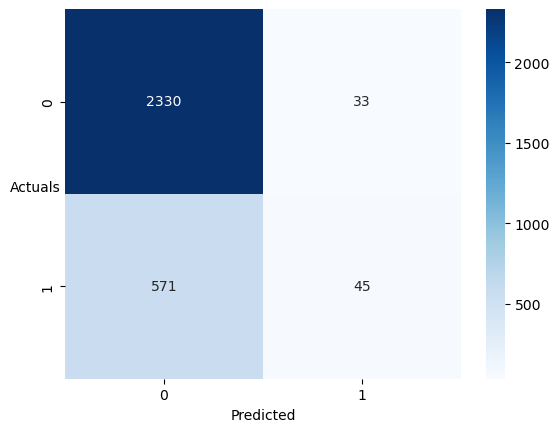

In [718]:
sns.heatmap((metrics.confusion_matrix(company_train['Default'],y_class_pred)),annot=True,fmt='.5g'
            ,cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

In [719]:
print(metrics.classification_report(company_train['Default'],y_class_pred,digits=3))

              precision    recall  f1-score   support

         0.0      0.803     0.986     0.885      2363
         1.0      0.577     0.073     0.130       616

    accuracy                          0.797      2979
   macro avg      0.690     0.530     0.507      2979
weighted avg      0.756     0.797     0.729      2979



#### Choosing the optimal threshold

In [720]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(company_train['Default'],y_prob_pred_train)

In [721]:
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
optimal_threshold

0.27145545428501505

#### Validating on the train set with revised threshold

In [722]:
y_class_pred=[]
for i in range(0,len(y_prob_pred_train)):
    if np.array(y_prob_pred_train)[i]>0.27:
        a=1
    else:
        a=0
    y_class_pred.append(a)

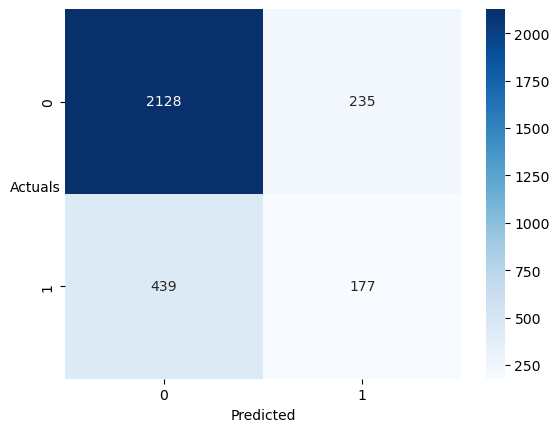

In [723]:
sns.heatmap((metrics.confusion_matrix(company_train['Default'],y_class_pred)),annot=True,fmt='.5g'
            ,cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

In [724]:
print(metrics.classification_report(company_train['Default'],y_class_pred,digits=3))

              precision    recall  f1-score   support

         0.0      0.829     0.901     0.863      2363
         1.0      0.430     0.287     0.344       616

    accuracy                          0.774      2979
   macro avg      0.629     0.594     0.604      2979
weighted avg      0.746     0.774     0.756      2979



### 6. Checking the accuracy of the model using confusion matrix for training set

In [1424]:
y_class_pred=[]
for i in range(0,len(y_prob_pred_train)):
    if np.array(y_prob_pred_train)[i]>0.20:
        a=1
    else:
        a=0
    y_class_pred.append(a)

In [1425]:
print(metrics.classification_report(company_train['Default'],y_class_pred,digits=3))

              precision    recall  f1-score   support

         0.0      0.837     0.634     0.721      2363
         1.0      0.272     0.526     0.359       616

    accuracy                          0.611      2979
   macro avg      0.555     0.580     0.540      2979
weighted avg      0.720     0.611     0.646      2979



In [1429]:
rf_train_auc = roc_auc_score(company_train['Default'],y_prob_pred_train)
print('AUC for the Train Data: %.3f' %rf_train_auc)

AUC for the Train Data: 0.606


### 7. Checking the accuracy of the model using confusion matrix for test set

In [728]:
y_prob_pred_test = model_20.predict(company_test)

In [729]:
y_class_pred=[]
for i in range(0,len(y_prob_pred_test)):
    if np.array(y_prob_pred_test)[i]>0.5:
        a=1
    else:
        a=0
    y_class_pred.append(a)

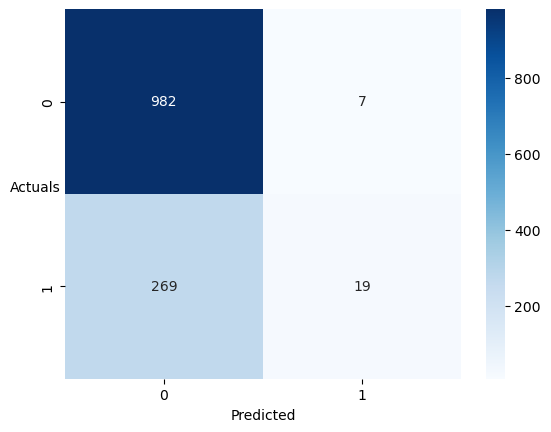

In [730]:
sns.heatmap((metrics.confusion_matrix(company_test['Default'],y_class_pred)),annot=True,fmt='.5g'
            ,cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

In [731]:
print(metrics.classification_report(company_test['Default'],y_class_pred,digits=3))

              precision    recall  f1-score   support

         0.0      0.785     0.993     0.877       989
         1.0      0.731     0.066     0.121       288

    accuracy                          0.784      1277
   macro avg      0.758     0.529     0.499      1277
weighted avg      0.773     0.784     0.706      1277



In [1427]:
rf_test_auc = roc_auc_score(company_test['Default'],y_prob_pred_test)

In [1428]:
print('AUC for the test Data: %.3f' %rf_test_auc)

AUC for the test Data: 0.539


In [732]:
y_class_pred=[]
for i in range(0,len(y_prob_pred_test)):
    if np.array(y_prob_pred_test)[i]>0.27:
        a=1
    else:
        a=0
    y_class_pred.append(a)

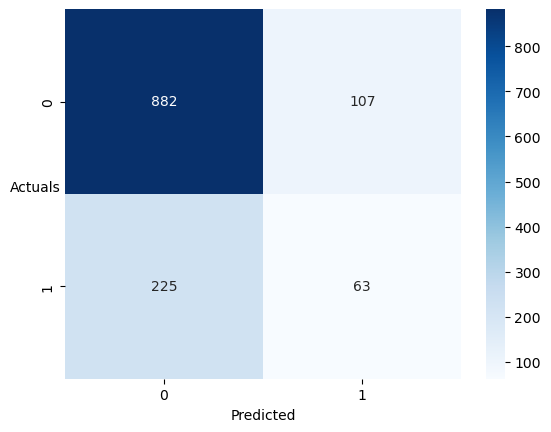

In [733]:
sns.heatmap((metrics.confusion_matrix(company_test['Default'],y_class_pred)),annot=True,fmt='.5g'
            ,cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

In [734]:
print(metrics.classification_report(company_test['Default'],y_class_pred,digits=3))

              precision    recall  f1-score   support

         0.0      0.797     0.892     0.842       989
         1.0      0.371     0.219     0.275       288

    accuracy                          0.740      1277
   macro avg      0.584     0.555     0.558      1277
weighted avg      0.701     0.740     0.714      1277



In [994]:
df = company_imputed
X = df.drop("Default",axis =1)
y = df["Default"]

### 1. StandardScaler

In [1240]:
X_ss = pd.DataFrame(StandardScaler().fit_transform(X),columns = X.columns)

In [1241]:
X_ss.head(5)

Total_assets  Net_worth  Total_income  Change_in_stock  Total_expenses  \
0         -0.09      -0.08         -0.07            -0.06           -0.07   
1         -0.12      -0.10         -0.08            -0.10           -0.08   
2         -0.11      -0.10         -0.08            -0.14           -0.08   
3          0.11       0.01          0.08             0.43            0.09   
4         -0.12      -0.10         -0.08            -0.09           -0.08   

   Profit_after_tax  PBDITA   PBT  Cash_profit  \
0             -0.08   -0.08 -0.08        -0.07   
1             -0.09   -0.10 -0.10        -0.10   
2             -0.09   -0.10 -0.09        -0.09   
3             -0.04   -0.03 -0.05        -0.05   
4             -0.09   -0.10 -0.10        -0.10   

   PBDITA_as_perc_of_total_income  ...  Creditors_turnover  Debtors_turnover  \
0                            0.12  ...               -0.07             -0.14   
1                            0.01  ...               -0.09             -0.07   
2                            0.03  ...               -0.20             -0.17   
3                            0.01  ...               -0.18             -0.18   
4                           -0.00  ...                0.06              0.59   

   Finished_goods_turnover  WIP_turnover  Raw_material_turnover  \
0                    -0.15         -0.16                  -0.01   
1                    -0.03         -0.01                  -0.03   
2                    -0.12         -0.13                  -0.03   
3                    -0.12         -0.07                  -0.03   
4                    -0.07         -0.00                  -0.00   

   Shares_outstanding  Equity_face_value  EPS  Adjusted_EPS  Total_liabilities  
0               -0.06               0.05 0.02          0.02              -0.09  
1               -0.10               0.05 0.02          0.02              -0.12  
2               -0.09               0.05 0.02          0.02              -0.11  
3               -0.05               0.05 0.02          0.02               0.11  
4               -0.11               0.05 0.01          0.01              -0.12  

[5 rows x 44 columns]

Since the random forest model is robust to the outliers so we are taking the dataset that is not treated with the outliers

### 8. Build a Random Forest Model on Train Dataset. Also showcase your model building approach


In [1243]:
from sklearn.ensemble import RandomForestClassifier

In [1244]:
rf_model = RandomForestClassifier()

In [1245]:
X_train, X_test, y_train, y_test = train_test_split(X_ss,y,test_size=0.3,random_state=42)

In [1246]:
rf_model.fit(X_train,y_train)

RandomForestClassifier()

In [1247]:
y_class_pred = rf_model.predict(X_train)

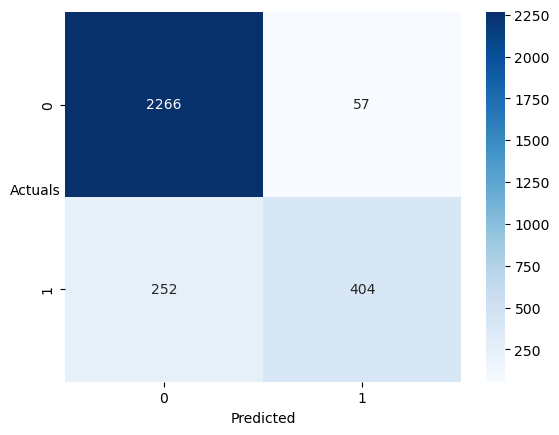

In [1249]:
sns.heatmap((metrics.confusion_matrix(y_train,y_class_pred)),annot=True,fmt='.5g'
            ,cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

In [1250]:
print(metrics.classification_report(y_train,y_class_pred,digits=3))

              precision    recall  f1-score   support

         0.0      0.900     0.975     0.936      2323
         1.0      0.876     0.616     0.723       656

    accuracy                          0.896      2979
   macro avg      0.888     0.796     0.830      2979
weighted avg      0.895     0.896     0.889      2979



In [1251]:
pred_prob_train = rf_model.predict_proba(X_train)
pred_prob_test = rf_model.predict_proba(X_test)

In [1252]:
y_class_pred = rf_model.predict(X_test)


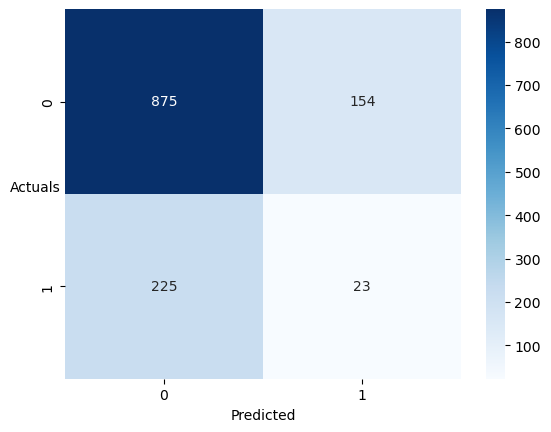

In [1253]:
sns.heatmap((metrics.confusion_matrix(y_test,y_class_pred)),annot=True,fmt='.5g'
            ,cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

In [1254]:
print(metrics.classification_report(y_test,y_class_pred,digits=3))

              precision    recall  f1-score   support

         0.0      0.795     0.850     0.822      1029
         1.0      0.130     0.093     0.108       248

    accuracy                          0.703      1277
   macro avg      0.463     0.472     0.465      1277
weighted avg      0.666     0.703     0.683      1277



AUC for the Train Data: 0.969
AUC for the Test Data: 0.339


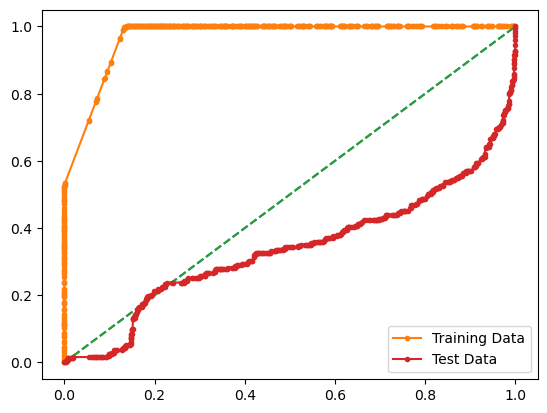

In [1256]:
# AUC and ROC for the training data

rf_train_auc = roc_auc_score(y_train,pred_prob_train[:,1])
print('AUC for the Train Data: %.3f' %rf_train_auc)

#  calculate roc curve
fpr, tpr, thresholds = roc_curve(y_train,pred_prob_train[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')


#AUC and ROC for the test data

# calculate AUC
rf_test_auc = roc_auc_score(y_test,pred_prob_test[:,1])
print('AUC for the Test Data: %.3f' %rf_test_auc)

#  calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test,pred_prob_test[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()


In [1010]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [3, 5, 7],
    'min_samples_leaf': [5, 10, 15],
    'min_samples_split': [15, 30, 45],
    'n_estimators': [100, 200,300]
}

rfcl = RandomForestClassifier()

grid_search = GridSearchCV(estimator = rfcl, param_grid = param_grid)

### 9. Validate the Random Forest Model on test Dataset and state the performance matrices. Also state interpretation from the model

In [1011]:
grid_search.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': [3, 5, 7],
                         'min_samples_leaf': [5, 10, 15],
                         'min_samples_split': [15, 30, 45],
                         'n_estimators': [100, 200, 300]})

In [1257]:
grid_search.best_params_

{'max_depth': 7,
 'min_samples_leaf': 10,
 'min_samples_split': 45,
 'n_estimators': 100}

In [1258]:
best_grid = grid_search.best_estimator_

In [1259]:
pred_train_rf = best_grid.predict(X_train)
pred_test_rf = best_grid.predict(X_test)
pred_prob_train = best_grid.predict_proba(X_train)
pred_prob_test = best_grid.predict_proba(X_test)

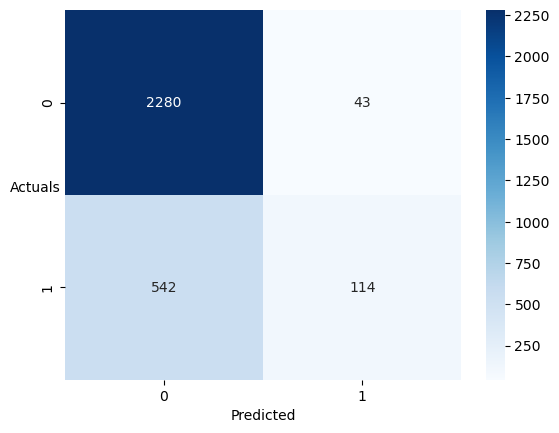

In [1260]:
sns.heatmap((metrics.confusion_matrix(y_train,pred_train_rf)),annot=True,fmt='.5g'
            ,cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

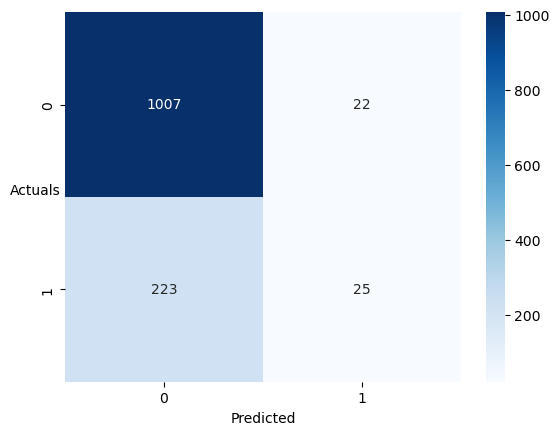

In [1262]:
sns.heatmap((metrics.confusion_matrix(y_test,pred_test_rf)),annot=True,fmt='.5g'
            ,cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

AUC for the Train Data: 0.757
AUC for the Test Data: 0.557


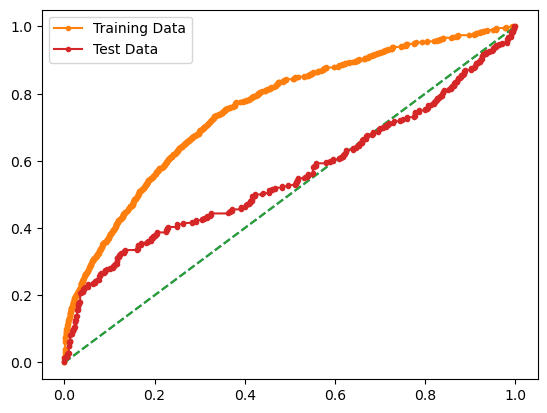

In [1263]:
# AUC and ROC for the training data

rf_train_auc = roc_auc_score(y_train,pred_prob_train[:,1])
print('AUC for the Train Data: %.3f' %rf_train_auc)

#  calculate roc curve
fpr, tpr, thresholds = roc_curve(y_train,pred_prob_train[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')


#AUC and ROC for the test data

# calculate AUC
rf_test_auc = roc_auc_score(y_test,pred_prob_test[:,1])
print('AUC for the Test Data: %.3f' %rf_test_auc)

#  calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test,pred_prob_test[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

In [1264]:
print(metrics.classification_report(y_train, pred_train_rf))

              precision    recall  f1-score   support

         0.0       0.81      0.98      0.89      2323
         1.0       0.73      0.17      0.28       656

    accuracy                           0.80      2979
   macro avg       0.77      0.58      0.58      2979
weighted avg       0.79      0.80      0.75      2979



In [1265]:
print(metrics.classification_report(y_test, pred_test_rf))

              precision    recall  f1-score   support

         0.0       0.82      0.98      0.89      1029
         1.0       0.53      0.10      0.17       248

    accuracy                           0.81      1277
   macro avg       0.68      0.54      0.53      1277
weighted avg       0.76      0.81      0.75      1277



### feature selection 

In [1279]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(X_train,y_train)

ExtraTreesClassifier()

In [1280]:
ranked_features = pd.Series(model.feature_importances_,index = X.columns)

In [1281]:
ranked_features.sort_values(ascending = False)

WIP_turnover                                     0.04
Debt_to_equity_ratio_times                       0.04
Shares_outstanding                               0.04
Finished_goods_turnover                          0.04
PAT_as_perc_of_net_worth                         0.03
Creditors_turnover                               0.03
TOL_to_TNW                                       0.03
Total_term_liabilities__to__tangible_net_worth   0.03
PBT_as_perc_of_total_income                      0.03
Debtors_turnover                                 0.03
Income_from_fincial_services                     0.03
Cash_profit_as_perc_of_total_income              0.03
PAT_as_perc_of_total_income                      0.03
Contingent_liabilities__to__Net_worth_perc       0.02
Change_in_stock                                  0.02
Raw_material_turnover                            0.02
PBDITA_as_perc_of_total_income                   0.02
Cash_to_current_liabilities_times                0.02
Cash_to_average_cost_of_sale

<AxesSubplot:>

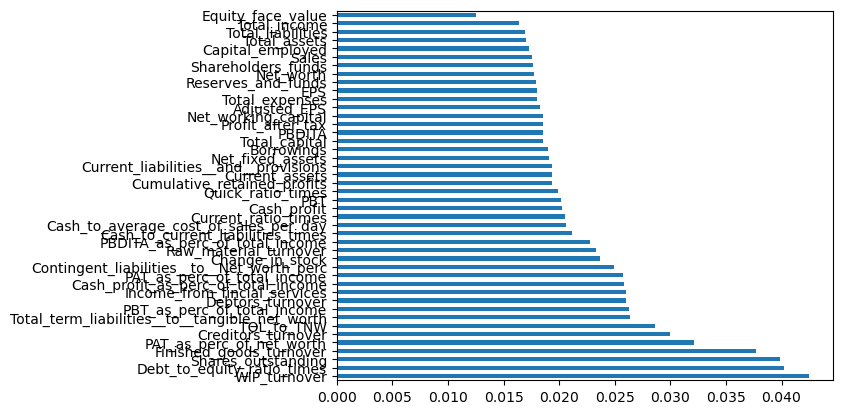

In [1282]:
ranked_features.sort_values(ascending = False).plot(kind = "barh")

In [1283]:
best_features = list(ranked_features.nlargest(10).index)

In [1284]:
best_features

['WIP_turnover',
 'Debt_to_equity_ratio_times',
 'Shares_outstanding',
 'Finished_goods_turnover',
 'PAT_as_perc_of_net_worth',
 'Creditors_turnover',
 'TOL_to_TNW',
 'Total_term_liabilities__to__tangible_net_worth',
 'PBT_as_perc_of_total_income',
 'Debtors_turnover']

In [1285]:
rf_model.fit(X_train[best_features],y_train)

RandomForestClassifier()

In [1286]:
y_class_pred = rf_model.predict(X_train[best_features])
pred_prob_train = rf_model.predict_proba(X_train[best_features])

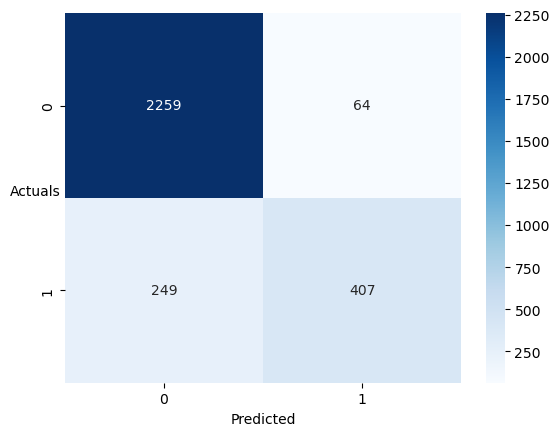

In [1287]:
sns.heatmap((metrics.confusion_matrix(y_train,y_class_pred)),annot=True,fmt='.5g'
            ,cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

In [1289]:
print(metrics.classification_report(y_train,y_class_pred,digits=3))

              precision    recall  f1-score   support

         0.0      0.901     0.972     0.935      2323
         1.0      0.864     0.620     0.722       656

    accuracy                          0.895      2979
   macro avg      0.882     0.796     0.829      2979
weighted avg      0.893     0.895     0.888      2979



## Test 

In [1290]:
y_class_pred = rf_model.predict(X_test[best_features])
pred_prob_test = rf_model.predict_proba(X_test[best_features])

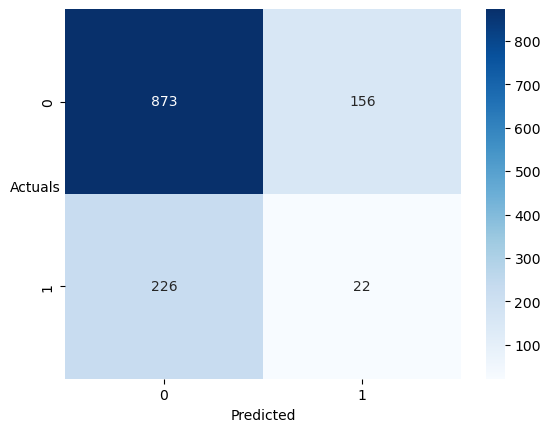

In [1291]:
sns.heatmap((metrics.confusion_matrix(y_test,y_class_pred)),annot=True,fmt='.5g'
            ,cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

In [1292]:
print(metrics.classification_report(y_test,y_class_pred,digits=3))

              precision    recall  f1-score   support

         0.0      0.794     0.848     0.820      1029
         1.0      0.124     0.089     0.103       248

    accuracy                          0.701      1277
   macro avg      0.459     0.469     0.462      1277
weighted avg      0.664     0.701     0.681      1277



AUC for the Train Data: 0.968
AUC for the Test Data: 0.328


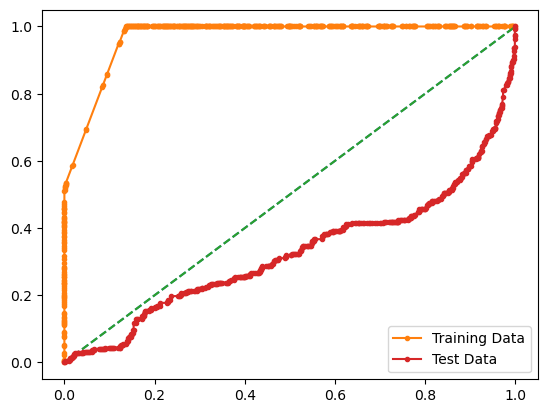

In [1294]:
# AUC and ROC for the training data

rf_train_auc = roc_auc_score(y_train,pred_prob_train[:,1])
print('AUC for the Train Data: %.3f' %rf_train_auc)

#  calculate roc curve
fpr, tpr, thresholds = roc_curve(y_train,pred_prob_train[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')


#AUC and ROC for the test data

# calculate AUC
rf_test_auc = roc_auc_score(y_test,pred_prob_test[:,1])
print('AUC for the Test Data: %.3f' %rf_test_auc)

#  calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test,pred_prob_test[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

### Grid_search

In [1295]:
grid_search.fit(X_train[best_features], y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': [3, 5, 7],
                         'min_samples_leaf': [5, 10, 15],
                         'min_samples_split': [15, 30, 45],
                         'n_estimators': [100, 200, 300]})

In [1312]:
grid_search.best_params_

{'max_depth': 5,
 'min_samples_leaf': 10,
 'min_samples_split': 45,
 'n_estimators': 300}

In [1313]:
best_grid = grid_search.best_estimator_

In [1314]:
pred_prob_train = best_grid.predict_proba(X_train[best_features])
pred_prob_test = best_grid.predict_proba(X_test[best_features])

In [1315]:
pred_train_rf = best_grid.predict(X_train[best_features])
pred_test_rf = best_grid.predict(X_test[best_features])

In [1316]:
print(metrics.classification_report(y_train, pred_train_rf))

              precision    recall  f1-score   support

         0.0       0.80      0.98      0.88      2323
         1.0       0.70      0.15      0.25       656

    accuracy                           0.80      2979
   macro avg       0.75      0.57      0.57      2979
weighted avg       0.78      0.80      0.74      2979



In [1317]:
print(metrics.classification_report(y_test, pred_test_rf))

              precision    recall  f1-score   support

         0.0       0.82      0.98      0.89      1029
         1.0       0.60      0.10      0.18       248

    accuracy                           0.81      1277
   macro avg       0.71      0.54      0.54      1277
weighted avg       0.78      0.81      0.76      1277



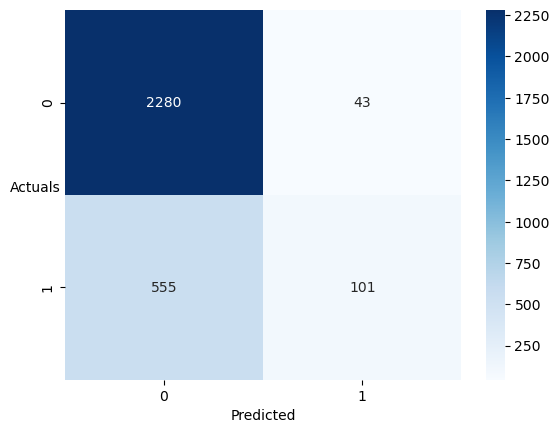

In [1318]:
sns.heatmap((metrics.confusion_matrix(y_train,pred_train_rf)),annot=True,fmt='.5g'
            ,cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

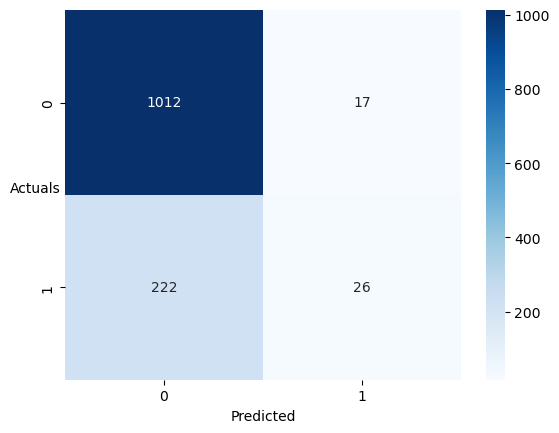

In [1319]:
sns.heatmap((metrics.confusion_matrix(y_test,pred_test_rf)),annot=True,fmt='.5g'
            ,cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

AUC for the Train Data: 0.705
AUC for the Test Data: 0.554


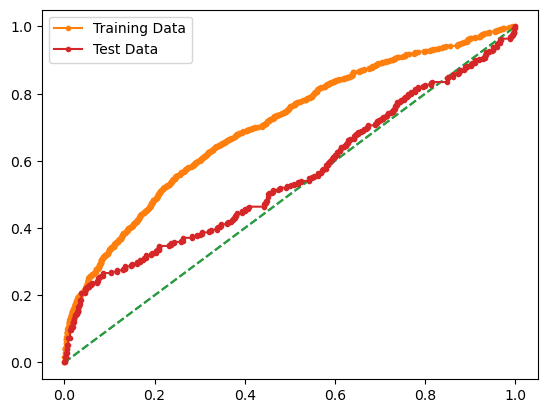

In [1320]:
# AUC and ROC for the training data

rf_train_auc = roc_auc_score(y_train,pred_prob_train[:,1])
print('AUC for the Train Data: %.3f' %rf_train_auc)

#  calculate roc curve
fpr, tpr, thresholds = roc_curve(y_train,pred_prob_train[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')


#AUC and ROC for the test data

# calculate AUC
rf_test_auc = roc_auc_score(y_test,pred_prob_test[:,1])
print('AUC for the Test Data: %.3f' %rf_test_auc)

#  calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test,pred_prob_test[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

## 1. Smote technique

In [1335]:
# Resampling the minority class. The strategy can be changed as required.
smt = SMOTE(random_state=42,sampling_strategy='minority',n_jobs=-1)

# Fit the model to generate the data.
X_res, y_res = smt.fit_resample(X_ss, y)

In [1336]:
X_train, X_test, y_train, y_test = train_test_split(X_res,y_res,test_size=0.3,random_state=42)

In [1337]:
X_train.shape

(4692, 44)

In [1338]:
X_test.shape

(2012, 44)

In [1339]:
rf_model.fit(X_train,y_train)

RandomForestClassifier()

In [1340]:
y_class_pred = rf_model.predict(X_train)

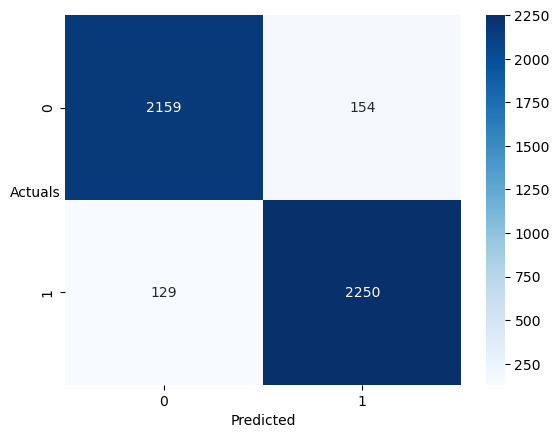

In [1341]:
sns.heatmap((metrics.confusion_matrix(y_train,y_class_pred)),annot=True,fmt='.5g'
            ,cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

In [1342]:
print(metrics.classification_report(y_train,y_class_pred,digits=3))

              precision    recall  f1-score   support

         0.0      0.944     0.933     0.938      2313
         1.0      0.936     0.946     0.941      2379

    accuracy                          0.940      4692
   macro avg      0.940     0.940     0.940      4692
weighted avg      0.940     0.940     0.940      4692



In [1343]:
pred_prob_train = rf_model.predict_proba(X_train)
pred_prob_test = rf_model.predict_proba(X_test)

In [1344]:
y_class_pred = rf_model.predict(X_test)


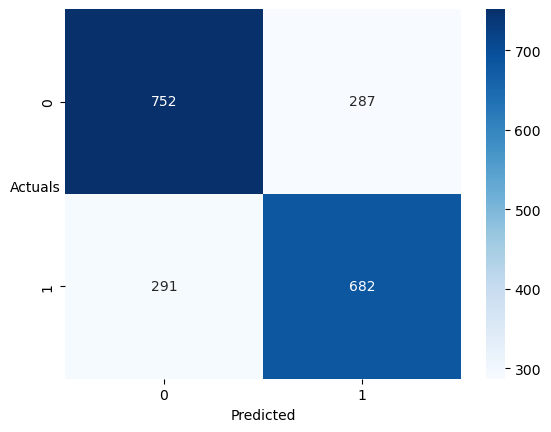

In [1345]:
sns.heatmap((metrics.confusion_matrix(y_test,y_class_pred)),annot=True,fmt='.5g'
            ,cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

In [1346]:
print(metrics.classification_report(y_test,y_class_pred,digits=3))

              precision    recall  f1-score   support

         0.0      0.721     0.724     0.722      1039
         1.0      0.704     0.701     0.702       973

    accuracy                          0.713      2012
   macro avg      0.712     0.712     0.712      2012
weighted avg      0.713     0.713     0.713      2012



AUC for the Train Data: 0.993
AUC for the Test Data: 0.703


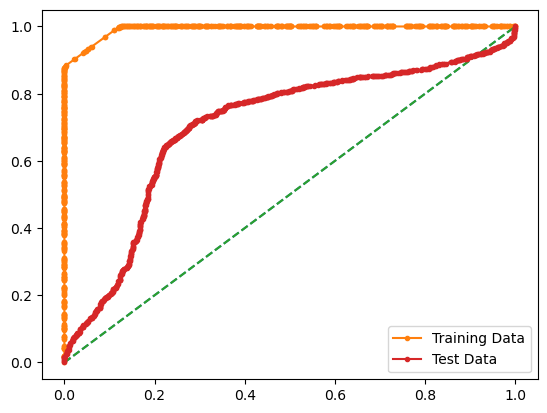

In [1347]:
# AUC and ROC for the training data

rf_train_auc = roc_auc_score(y_train,pred_prob_train[:,1])
print('AUC for the Train Data: %.3f' %rf_train_auc)

#  calculate roc curve
fpr, tpr, thresholds = roc_curve(y_train,pred_prob_train[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')


#AUC and ROC for the test data

# calculate AUC
rf_test_auc = roc_auc_score(y_test,pred_prob_test[:,1])
print('AUC for the Test Data: %.3f' %rf_test_auc)

#  calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test,pred_prob_test[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()


### Smote technique with grid searchCV

In [1360]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [5, 7, 9],
    'min_samples_leaf': [5, 10, 15],
    'min_samples_split': [15, 30, 45],
    'n_estimators': [100, 200,300]
}

rfcl = RandomForestClassifier()

grid_search = GridSearchCV(estimator = rfcl, param_grid = param_grid,n_jobs=-1)

In [1361]:
grid_search.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [5, 7, 9],
                         'min_samples_leaf': [5, 10, 15],
                         'min_samples_split': [15, 30, 45],
                         'n_estimators': [100, 200, 300]})

In [1370]:
grid_search.best_params_

{'max_depth': 9,
 'min_samples_leaf': 5,
 'min_samples_split': 15,
 'n_estimators': 200}

In [1371]:
best_grid = grid_search.best_estimator_

In [1372]:
pred_train_rf = best_grid.predict(X_train)
pred_test_rf = best_grid.predict(X_test)
pred_prob_train = best_grid.predict_proba(X_train)
pred_prob_test = best_grid.predict_proba(X_test)

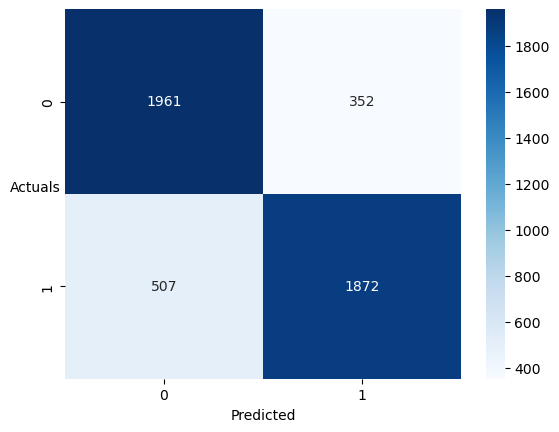

In [1373]:
sns.heatmap((metrics.confusion_matrix(y_train,pred_train_rf)),annot=True,fmt='.5g'
            ,cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

In [1374]:
print(metrics.classification_report(y_train, pred_train_rf))

              precision    recall  f1-score   support

         0.0       0.79      0.85      0.82      2313
         1.0       0.84      0.79      0.81      2379

    accuracy                           0.82      4692
   macro avg       0.82      0.82      0.82      4692
weighted avg       0.82      0.82      0.82      4692



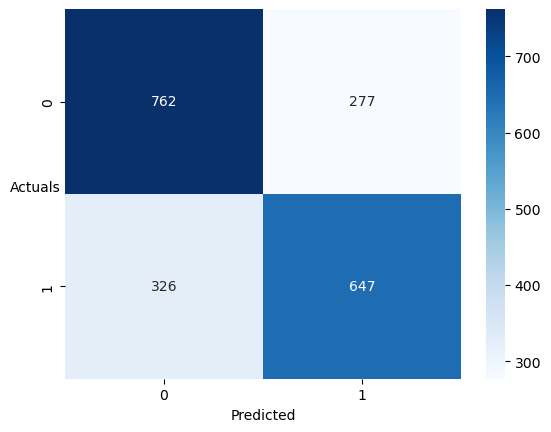

In [1375]:
sns.heatmap((metrics.confusion_matrix(y_test,pred_test_rf)),annot=True,fmt='.5g'
            ,cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

In [1376]:
print(metrics.classification_report(y_test, pred_test_rf))

              precision    recall  f1-score   support

         0.0       0.70      0.73      0.72      1039
         1.0       0.70      0.66      0.68       973

    accuracy                           0.70      2012
   macro avg       0.70      0.70      0.70      2012
weighted avg       0.70      0.70      0.70      2012



AUC for the Train Data: 0.897
AUC for the Test Data: 0.762


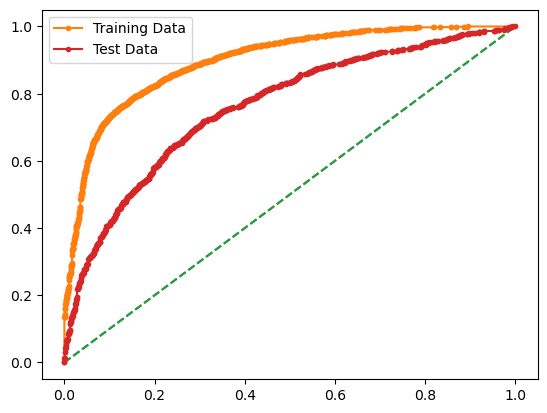

In [1377]:
# AUC and ROC for the training data

rf_train_auc = roc_auc_score(y_train,pred_prob_train[:,1])
print('AUC for the Train Data: %.3f' %rf_train_auc)

#  calculate roc curve
fpr, tpr, thresholds = roc_curve(y_train,pred_prob_train[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')


#AUC and ROC for the test data

# calculate AUC
rf_test_auc = roc_auc_score(y_test,pred_prob_test[:,1])
print('AUC for the Test Data: %.3f' %rf_test_auc)

#  calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test,pred_prob_test[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

### Smote with the selected features

In [1075]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(X_train,y_train)

ExtraTreesClassifier()

In [1076]:
ranked_features = pd.Series(model.feature_importances_,index = X.columns)

<AxesSubplot:>

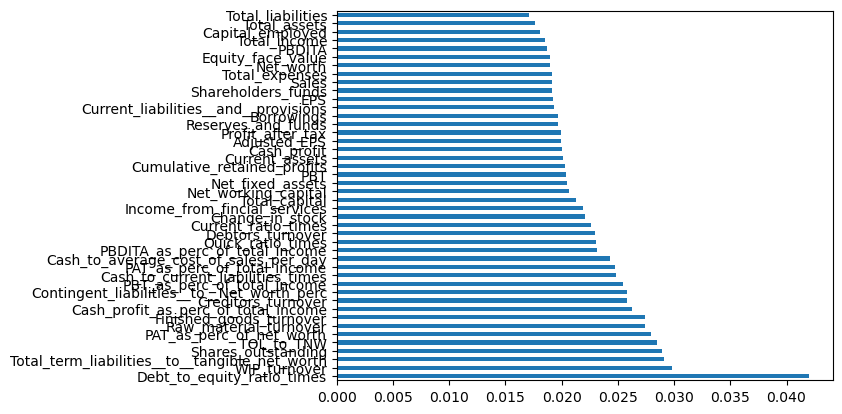

In [1078]:
ranked_features.sort_values(ascending = False).plot(kind = "barh")

In [1079]:
best_features = list(ranked_features.nlargest(10).index)

In [1081]:
rf_model.fit(X_train[best_features],y_train)

RandomForestClassifier()

In [1082]:
y_class_pred = rf_model.predict(X_train[best_features])
pred_prob_train = rf_model.predict_proba(X_train[best_features])

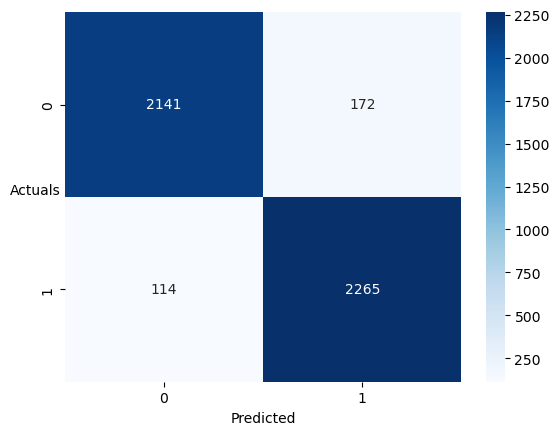

In [1083]:
sns.heatmap((metrics.confusion_matrix(y_train,y_class_pred)),annot=True,fmt='.5g'
            ,cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

In [1084]:
print(metrics.classification_report(y_train,y_class_pred,digits=3))

              precision    recall  f1-score   support

         0.0      0.949     0.926     0.937      2313
         1.0      0.929     0.952     0.941      2379

    accuracy                          0.939      4692
   macro avg      0.939     0.939     0.939      4692
weighted avg      0.939     0.939     0.939      4692



## Test 

In [1085]:
y_class_pred = rf_model.predict(X_test[best_features])
pred_prob_test = rf_model.predict_proba(X_test[best_features])

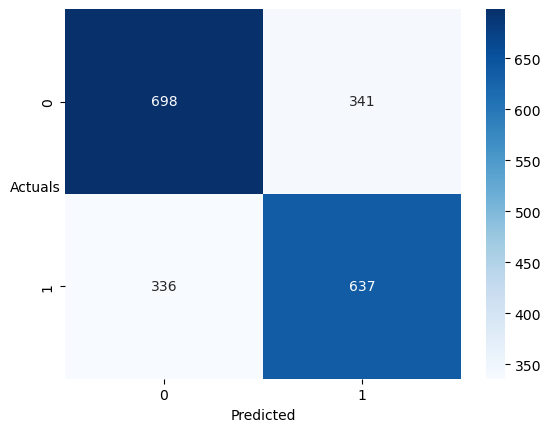

In [1086]:
sns.heatmap((metrics.confusion_matrix(y_test,y_class_pred)),annot=True,fmt='.5g'
            ,cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

In [1087]:
print(metrics.classification_report(y_test,y_class_pred,digits=3))

              precision    recall  f1-score   support

         0.0      0.675     0.672     0.673      1039
         1.0      0.651     0.655     0.653       973

    accuracy                          0.664      2012
   macro avg      0.663     0.663     0.663      2012
weighted avg      0.664     0.664     0.664      2012



AUC for the Train Data: 0.993
AUC for the Test Data: 0.654


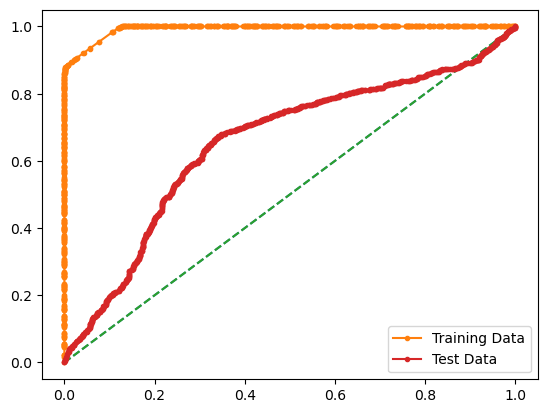

In [1088]:
# AUC and ROC for the training data

rf_train_auc = roc_auc_score(y_train,pred_prob_train[:,1])
print('AUC for the Train Data: %.3f' %rf_train_auc)

#  calculate roc curve
fpr, tpr, thresholds = roc_curve(y_train,pred_prob_train[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')


#AUC and ROC for the test data

# calculate AUC
rf_test_auc = roc_auc_score(y_test,pred_prob_test[:,1])
print('AUC for the Test Data: %.3f' %rf_test_auc)

#  calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test,pred_prob_test[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

### 2. Smote Tomek technique

In [1400]:
from imblearn.combine import SMOTETomek,SMOTEENN

In [1401]:
# Resampling the minority class. The strategy can be changed as required.
smt = SMOTETomek(random_state=42,sampling_strategy='minority',n_jobs=-1)

# Fit the model to generate the data.
X_res, y_res = smt.fit_resample(X_ss, y)

In [1402]:
X_train, X_test, y_train, y_test = train_test_split(X_res,y_res,test_size=0.3,random_state=42)

In [1403]:
X_train.shape

(4121, 44)

In [1404]:
rf_model.fit(X_train,y_train)

RandomForestClassifier()

In [1405]:
y_class_pred = rf_model.predict(X_train)

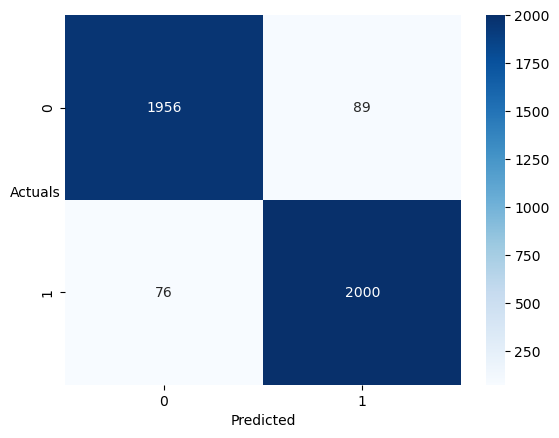

In [1406]:
sns.heatmap((metrics.confusion_matrix(y_train,y_class_pred)),annot=True,fmt='.5g'
            ,cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

In [1407]:
print(metrics.classification_report(y_train,y_class_pred,digits=3))

              precision    recall  f1-score   support

         0.0      0.963     0.956     0.960      2045
         1.0      0.957     0.963     0.960      2076

    accuracy                          0.960      4121
   macro avg      0.960     0.960     0.960      4121
weighted avg      0.960     0.960     0.960      4121



In [1408]:
pred_prob_train = rf_model.predict_proba(X_train)
pred_prob_test = rf_model.predict_proba(X_test)

In [1409]:
y_class_pred = rf_model.predict(X_test)


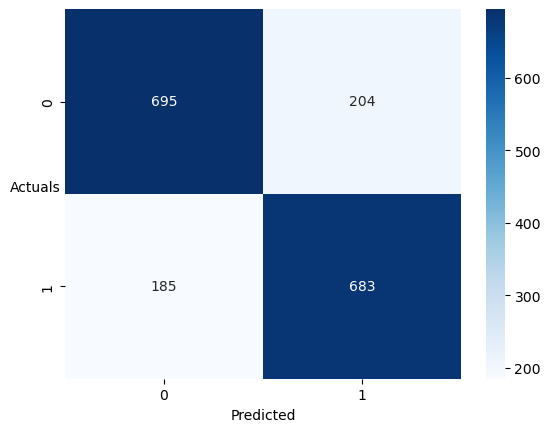

In [1410]:
sns.heatmap((metrics.confusion_matrix(y_test,y_class_pred)),annot=True,fmt='.5g'
            ,cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

In [1411]:
print(metrics.classification_report(y_test,y_class_pred,digits=3))

              precision    recall  f1-score   support

         0.0      0.790     0.773     0.781       899
         1.0      0.770     0.787     0.778       868

    accuracy                          0.780      1767
   macro avg      0.780     0.780     0.780      1767
weighted avg      0.780     0.780     0.780      1767



AUC for the Train Data: 0.997
AUC for the Test Data: 0.811


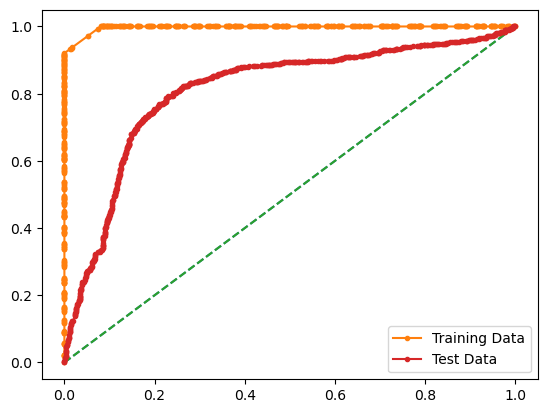

In [1412]:
# AUC and ROC for the training data

rf_train_auc = roc_auc_score(y_train,pred_prob_train[:,1])
print('AUC for the Train Data: %.3f' %rf_train_auc)

#  calculate roc curve
fpr, tpr, thresholds = roc_curve(y_train,pred_prob_train[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')


#AUC and ROC for the test data

# calculate AUC
rf_test_auc = roc_auc_score(y_test,pred_prob_test[:,1])
print('AUC for the Test Data: %.3f' %rf_test_auc)

#  calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test,pred_prob_test[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()


### Smote-tomek with the grid search

In [1391]:
grid_search.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [5, 7, 9],
                         'min_samples_leaf': [5, 10, 15],
                         'min_samples_split': [15, 30, 45],
                         'n_estimators': [100, 200, 300]})

In [1413]:
grid_search.best_params_

{'max_depth': 9,
 'min_samples_leaf': 5,
 'min_samples_split': 15,
 'n_estimators': 300}

In [1414]:
best_grid = grid_search.best_estimator_

In [1415]:
pred_train_rf = best_grid.predict(X_train)
pred_test_rf = best_grid.predict(X_test)
pred_prob_train = best_grid.predict_proba(X_train)
pred_prob_test = best_grid.predict_proba(X_test)

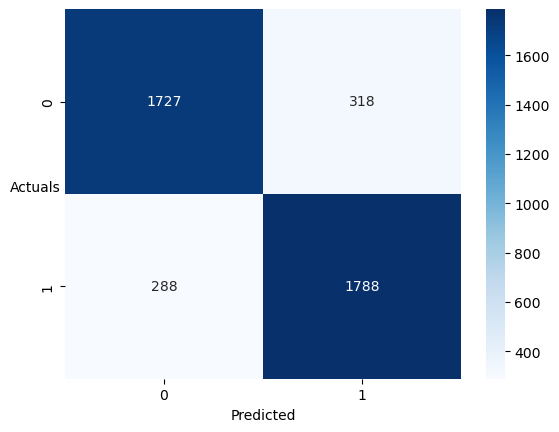

In [1416]:
sns.heatmap((metrics.confusion_matrix(y_train,pred_train_rf)),annot=True,fmt='.5g'
            ,cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

In [1417]:
print(metrics.classification_report(y_train, pred_train_rf))

              precision    recall  f1-score   support

         0.0       0.86      0.84      0.85      2045
         1.0       0.85      0.86      0.86      2076

    accuracy                           0.85      4121
   macro avg       0.85      0.85      0.85      4121
weighted avg       0.85      0.85      0.85      4121



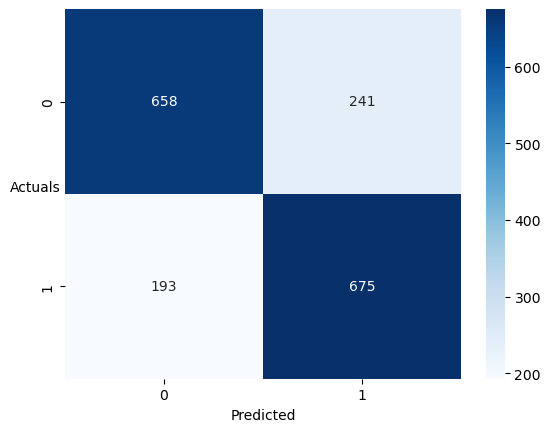

In [1418]:
sns.heatmap((metrics.confusion_matrix(y_test,pred_test_rf)),annot=True,fmt='.5g'
            ,cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

In [1419]:
print(metrics.classification_report(y_test, pred_test_rf))

              precision    recall  f1-score   support

         0.0       0.77      0.73      0.75       899
         1.0       0.74      0.78      0.76       868

    accuracy                           0.75      1767
   macro avg       0.76      0.75      0.75      1767
weighted avg       0.76      0.75      0.75      1767



AUC for the Train Data: 0.929
AUC for the Test Data: 0.832


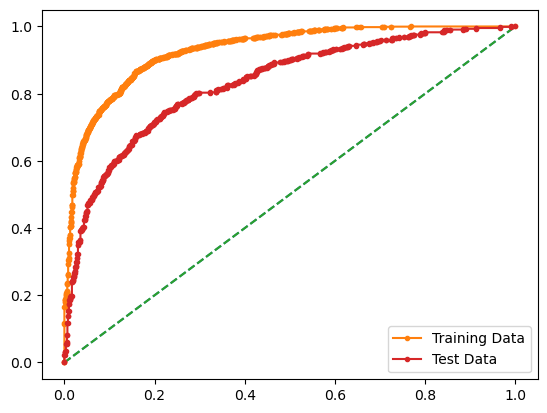

In [1420]:
# AUC and ROC for the training data

rf_train_auc = roc_auc_score(y_train,pred_prob_train[:,1])
print('AUC for the Train Data: %.3f' %rf_train_auc)

#  calculate roc curve
fpr, tpr, thresholds = roc_curve(y_train,pred_prob_train[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')


#AUC and ROC for the test data

# calculate AUC
rf_test_auc = roc_auc_score(y_test,pred_prob_test[:,1])
print('AUC for the Test Data: %.3f' %rf_test_auc)

#  calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test,pred_prob_test[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

### Smot-tomek with the selected features

In [1203]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(X_train,y_train)

ExtraTreesClassifier()

In [1204]:
ranked_features = pd.Series(model.feature_importances_,index = X.columns)

<AxesSubplot:>

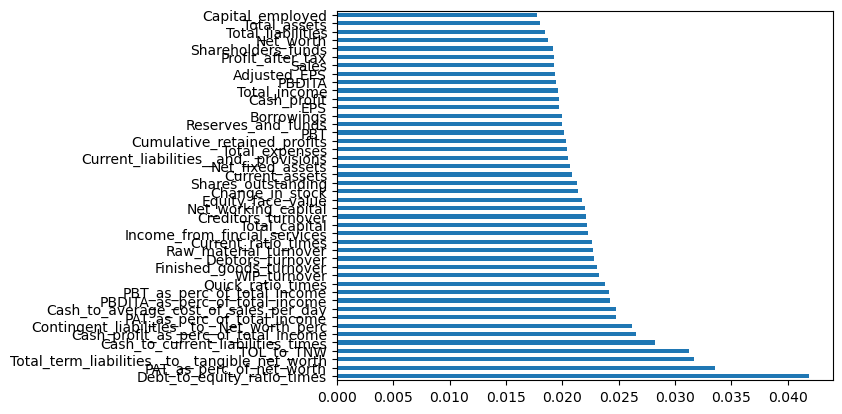

In [1205]:
ranked_features.sort_values(ascending = False).plot(kind = "barh")

In [1206]:
best_features = list(ranked_features.nlargest(10).index)

In [1207]:
rf_model.fit(X_train[best_features],y_train)

RandomForestClassifier()

In [1208]:
y_class_pred = rf_model.predict(X_train[best_features])
pred_prob_train = rf_model.predict_proba(X_train[best_features])

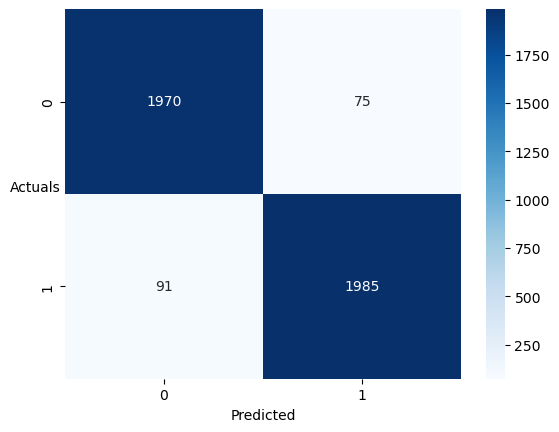

In [1209]:
sns.heatmap((metrics.confusion_matrix(y_train,y_class_pred)),annot=True,fmt='.5g'
            ,cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

In [1210]:
print(metrics.classification_report(y_train,y_class_pred,digits=3))

              precision    recall  f1-score   support

         0.0      0.956     0.963     0.960      2045
         1.0      0.964     0.956     0.960      2076

    accuracy                          0.960      4121
   macro avg      0.960     0.960     0.960      4121
weighted avg      0.960     0.960     0.960      4121



## Test 

In [1211]:
y_class_pred = rf_model.predict(X_test[best_features])
pred_prob_test = rf_model.predict_proba(X_test[best_features])

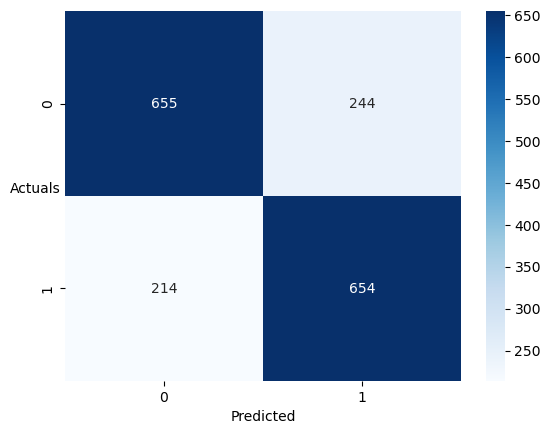

In [1212]:
sns.heatmap((metrics.confusion_matrix(y_test,y_class_pred)),annot=True,fmt='.5g'
            ,cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

In [1213]:
print(metrics.classification_report(y_test,y_class_pred,digits=3))

              precision    recall  f1-score   support

         0.0      0.754     0.729     0.741       899
         1.0      0.728     0.753     0.741       868

    accuracy                          0.741      1767
   macro avg      0.741     0.741     0.741      1767
weighted avg      0.741     0.741     0.741      1767



AUC for the Train Data: 0.997
AUC for the Test Data: 0.776


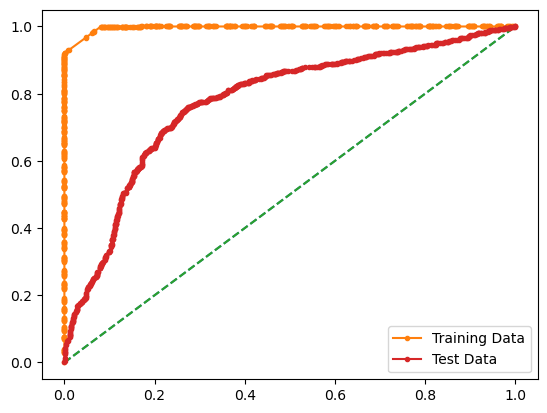

In [1214]:
# AUC and ROC for the training data

rf_train_auc = roc_auc_score(y_train,pred_prob_train[:,1])
print('AUC for the Train Data: %.3f' %rf_train_auc)

#  calculate roc curve
fpr, tpr, thresholds = roc_curve(y_train,pred_prob_train[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')


#AUC and ROC for the test data

# calculate AUC
rf_test_auc = roc_auc_score(y_test,pred_prob_test[:,1])
print('AUC for the Test Data: %.3f' %rf_test_auc)

#  calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test,pred_prob_test[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

### 3. Smote ENN technique

In [1215]:
from imblearn.combine import SMOTETomek,SMOTEENN

In [1216]:
# Resampling the minority class. The strategy can be changed as required.
smt = SMOTEENN(random_state=42,sampling_strategy='minority',n_jobs=-1)

# Fit the model to generate the data.
X_res, y_res = smt.fit_resample(X_ss, y)

In [1217]:
X_train, X_test, y_train, y_test = train_test_split(X_res,y_res,test_size=0.3,random_state=42)

In [1218]:
X_train.shape

(1544, 44)

In [1219]:
rf_model.fit(X_train,y_train)

RandomForestClassifier()

In [1220]:
y_class_pred = rf_model.predict(X_train)

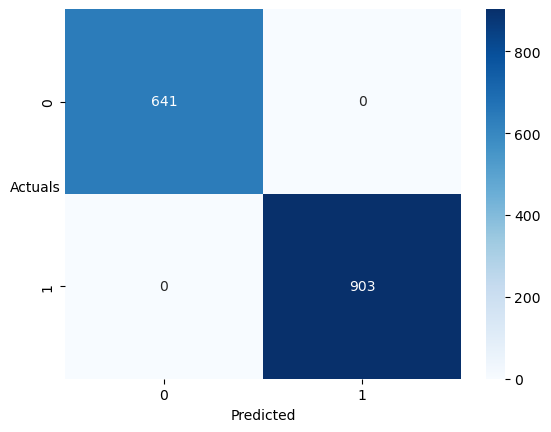

In [1221]:
sns.heatmap((metrics.confusion_matrix(y_train,y_class_pred)),annot=True,fmt='.5g'
            ,cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

In [1222]:
print(metrics.classification_report(y_train,y_class_pred,digits=3))

              precision    recall  f1-score   support

         0.0      1.000     1.000     1.000       641
         1.0      1.000     1.000     1.000       903

    accuracy                          1.000      1544
   macro avg      1.000     1.000     1.000      1544
weighted avg      1.000     1.000     1.000      1544



In [1223]:
pred_prob_train = rf_model.predict_proba(X_train)
pred_prob_test = rf_model.predict_proba(X_test)

In [1224]:
y_class_pred = rf_model.predict(X_test)


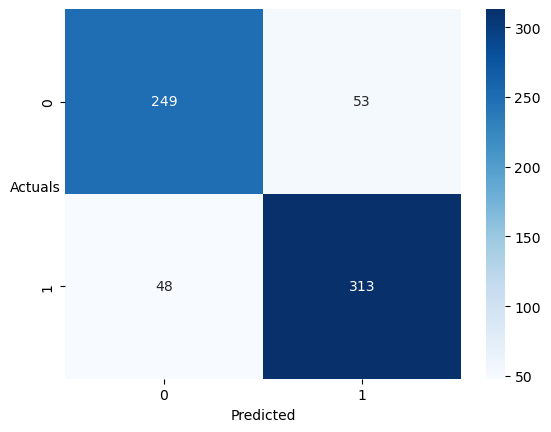

In [1225]:
sns.heatmap((metrics.confusion_matrix(y_test,y_class_pred)),annot=True,fmt='.5g'
            ,cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

In [1226]:
print(metrics.classification_report(y_test,y_class_pred,digits=3))

              precision    recall  f1-score   support

         0.0      0.838     0.825     0.831       302
         1.0      0.855     0.867     0.861       361

    accuracy                          0.848       663
   macro avg      0.847     0.846     0.846       663
weighted avg      0.848     0.848     0.848       663



AUC for the Train Data: 1.000
AUC for the Test Data: 0.929


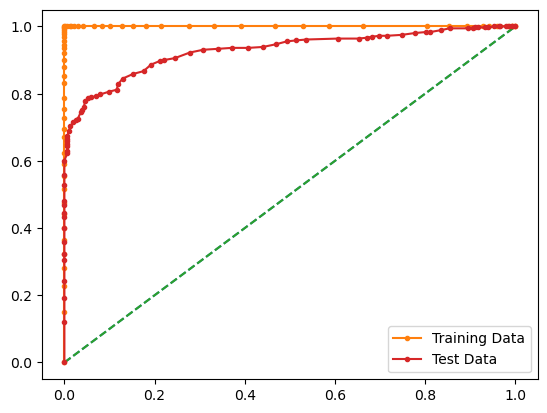

In [1227]:
# AUC and ROC for the training data

rf_train_auc = roc_auc_score(y_train,pred_prob_train[:,1])
print('AUC for the Train Data: %.3f' %rf_train_auc)

#  calculate roc curve
fpr, tpr, thresholds = roc_curve(y_train,pred_prob_train[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')


#AUC and ROC for the test data

# calculate AUC
rf_test_auc = roc_auc_score(y_test,pred_prob_test[:,1])
print('AUC for the Test Data: %.3f' %rf_test_auc)

#  calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test,pred_prob_test[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()


### Smot-enn with the selected features

In [1228]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(X_train,y_train)

ExtraTreesClassifier()

In [1229]:
ranked_features = pd.Series(model.feature_importances_,index = X.columns)

<AxesSubplot:>

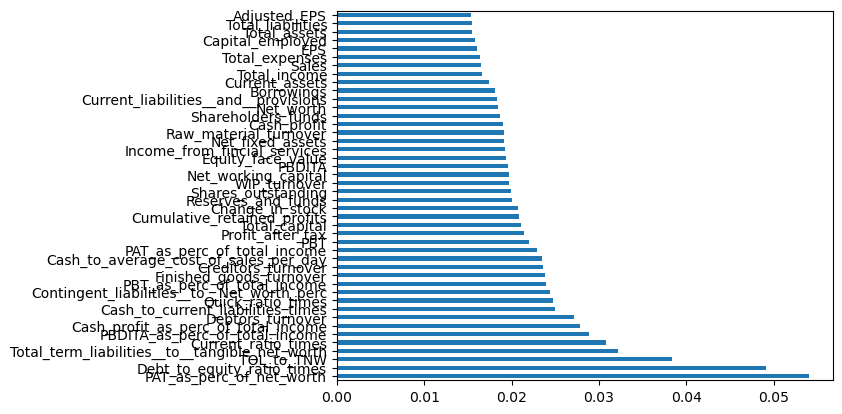

In [1230]:
ranked_features.sort_values(ascending = False).plot(kind = "barh")

In [1231]:
best_features = list(ranked_features.nlargest(10).index)

In [1232]:
rf_model.fit(X_train[best_features],y_train)

RandomForestClassifier()

In [1233]:
y_class_pred = rf_model.predict(X_train[best_features])
pred_prob_train = rf_model.predict_proba(X_train[best_features])

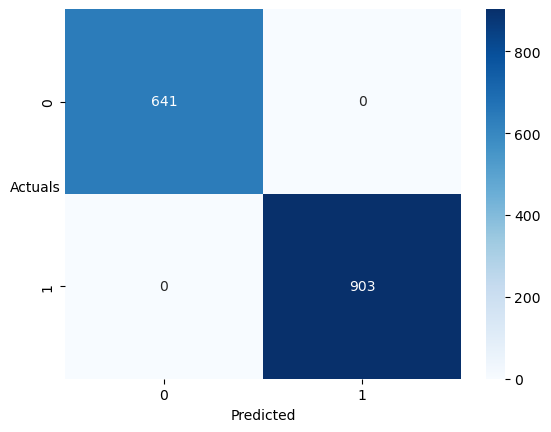

In [1234]:
sns.heatmap((metrics.confusion_matrix(y_train,y_class_pred)),annot=True,fmt='.5g'
            ,cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

In [1235]:
print(metrics.classification_report(y_train,y_class_pred,digits=3))

              precision    recall  f1-score   support

         0.0      1.000     1.000     1.000       641
         1.0      1.000     1.000     1.000       903

    accuracy                          1.000      1544
   macro avg      1.000     1.000     1.000      1544
weighted avg      1.000     1.000     1.000      1544



## Test 

In [1236]:
y_class_pred = rf_model.predict(X_test[best_features])
pred_prob_test = rf_model.predict_proba(X_test[best_features])

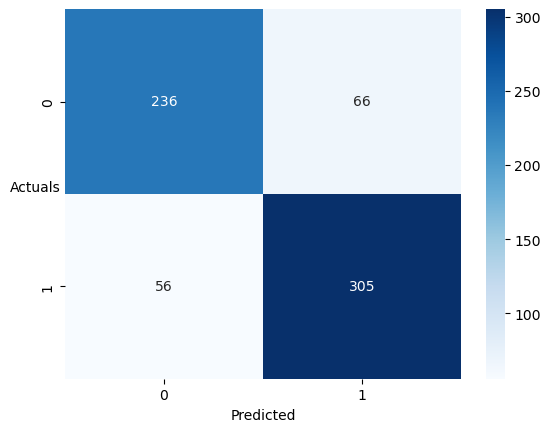

In [1237]:
sns.heatmap((metrics.confusion_matrix(y_test,y_class_pred)),annot=True,fmt='.5g'
            ,cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

In [1238]:
print(metrics.classification_report(y_test,y_class_pred,digits=3))

              precision    recall  f1-score   support

         0.0      0.808     0.781     0.795       302
         1.0      0.822     0.845     0.833       361

    accuracy                          0.816       663
   macro avg      0.815     0.813     0.814       663
weighted avg      0.816     0.816     0.816       663



AUC for the Train Data: 1.000
AUC for the Test Data: 0.896


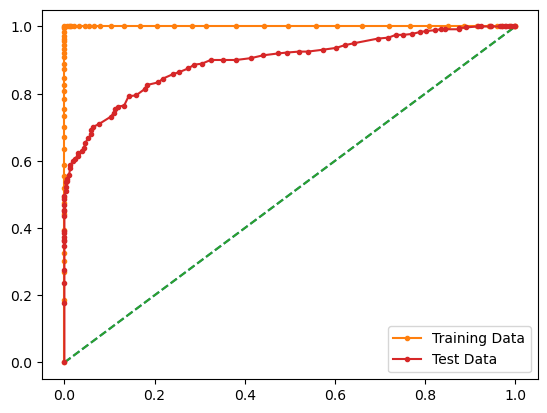

In [1239]:
# AUC and ROC for the training data

rf_train_auc = roc_auc_score(y_train,pred_prob_train[:,1])
print('AUC for the Train Data: %.3f' %rf_train_auc)

#  calculate roc curve
fpr, tpr, thresholds = roc_curve(y_train,pred_prob_train[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')


#AUC and ROC for the test data

# calculate AUC
rf_test_auc = roc_auc_score(y_test,pred_prob_test[:,1])
print('AUC for the Test Data: %.3f' %rf_test_auc)

#  calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test,pred_prob_test[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

### 10. Comparison of Random Forest model with logistic regression model

### 11. Conclusion and Recommendations